<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/2020kagglesurvey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import missingno as msno
import plotly.graph_objs as po
from matplotlib import gridspec
import matplotlib.patches as mpatches
import matplotlib as mpl
from collections import Counter
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable
import squarify

In [ ]:
text ='Writing programs (or programming) is a very creative and rewarding activity. You can write programs for many reasons ranging from making your living to solving a difficult data analysis problem to having fun to helping someone else solve a problem. This book assumes that everyone needs to know how to program and that once you know how to program, you will figure out what you want to do with your newfound skills.We are surrounded in our daily lives with computers ranging from laptops to cell phones. We can think of these computers as our “personal assistants” who can take care of many things on our behalf. The hardware in our current-day computers is essentially built to continuously ask us the question, “What would you like me to do next?”Our computers are fast and have vast amounts of memory and could be very helpful to us if we only knew the language to speak to explain to the computer what we would like it to do next. If we knew this language we could tell the computer to do tasks on our behalf that were repetitive. Interestingly, the kinds of things computers can do best are often the kinds of things that we humans find boring and mind-numbing.'

In [ ]:
text_d = dict(Counter(text.split()))

In [ ]:
text_s = text.split()  ## from collections import Counter 모듈쓰면 편함
counts = dict()
for x in text_s:
  counts[x] = counts.get(x, 0) +1

bigword = None
bigcounts = None
sword = None
scounts = None
for x,y in counts.items():
  if bigcounts is None or y > bigcounts:
    bigword = x
    bigcounts = y
print(bigword)
print(bigcounts)
for i,j in counts.items():
  if scounts is None or  j < scounts:
    sword = i
    scounts = j
print(sword)
print(scounts)

to
16
mind-numbing.
1


In [ ]:
for x in text_s:    ## for x in text_s: counts[x] = counts.get(x,0) + 1 똑같or x in text_s:    ## for x in text_s: counts[x] = counts.get(x,0) + 1 똑같
  if x not in counts:
      counts[x] = 1
        else:
            counts[x] = counts[x] + 1

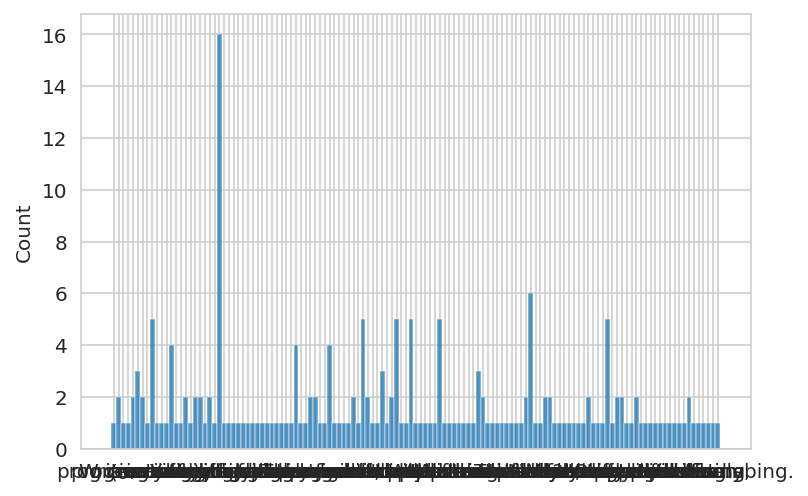

In [ ]:
sns.histplot(list(text_s))

TypeError: ignored

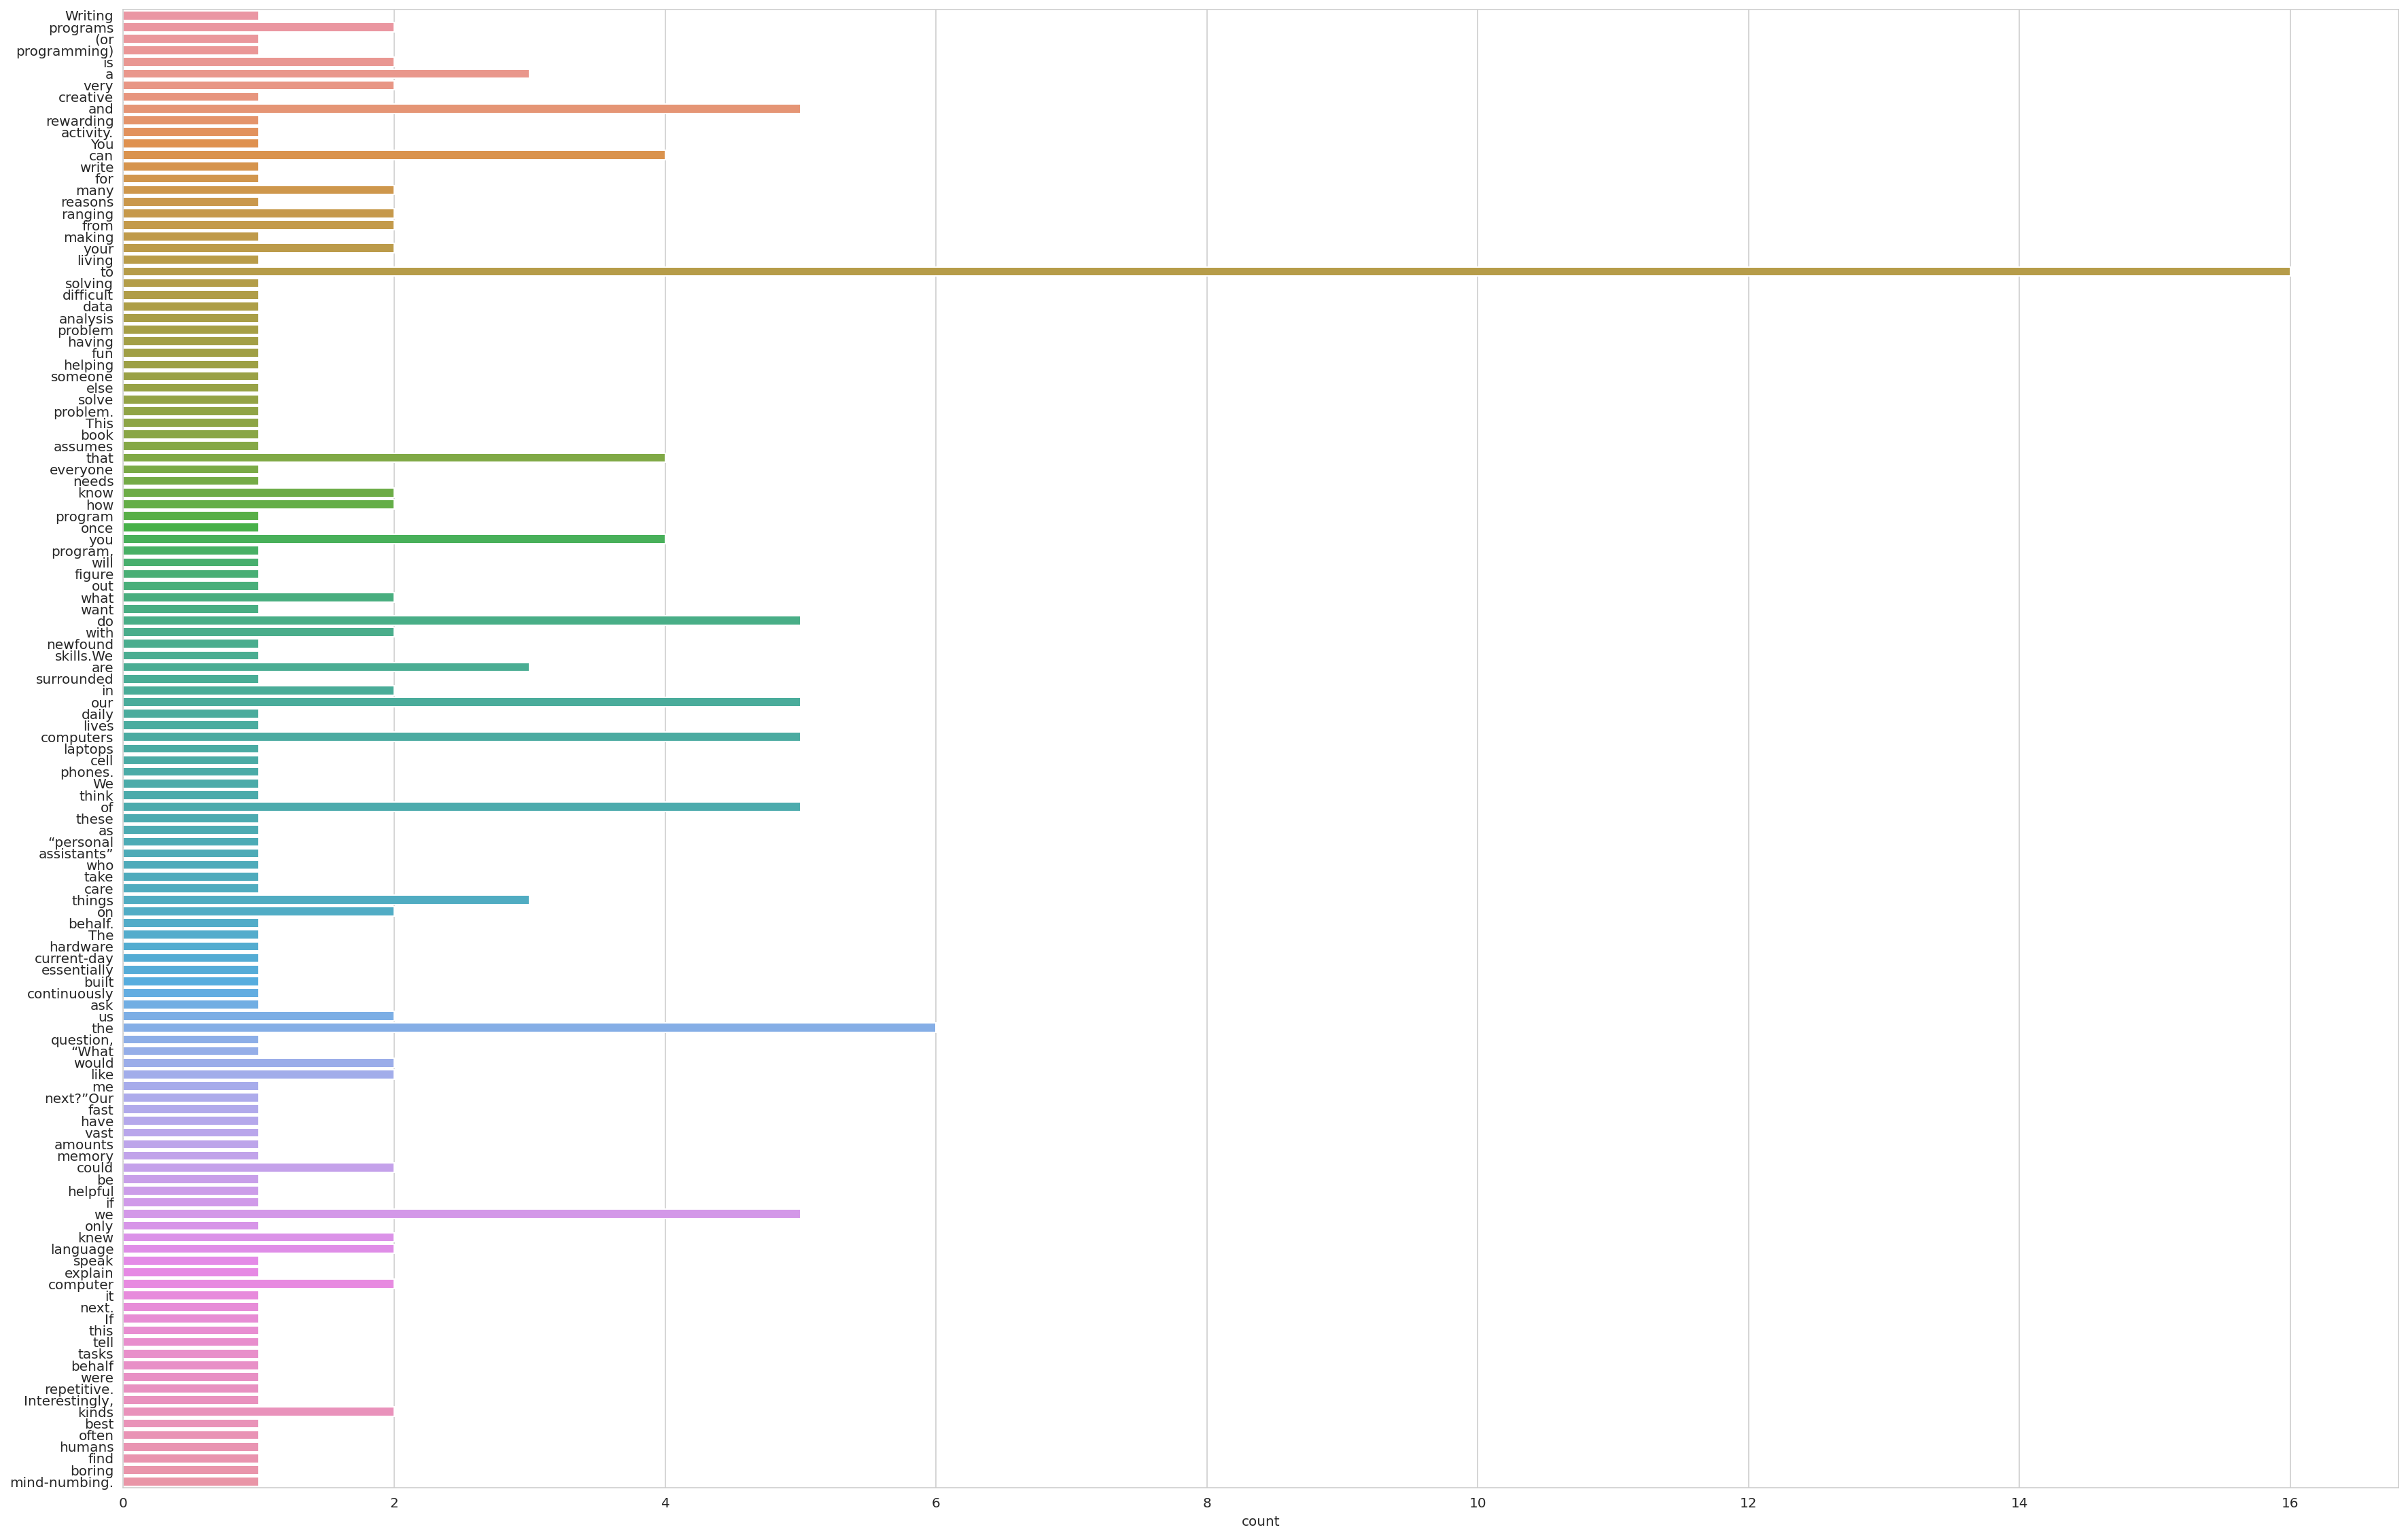

In [ ]:
plt.figure(figsize=(30,20))
sns.countplot(y=list(text_s))

In [ ]:
b = {}
b['power'] = 3
b['china'] = 5
b['gor'] = 8
b['sleep'] =6
c = [x for x in b.keys() if x not in 'gor']
c

['power', 'china', 'sleep']

딕셔너리(dict) 연습장

In [ ]:
!pip install plotly.express

In [2]:
data = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/kaggle survey/2020/kaggle_survey_2020_responses.csv')

In [3]:
questions = data.iloc[0,:].T    ## 질문과 답변을 분리해줌
data = data.iloc[1:,:]

In [ ]:
data_q1

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

Text(0.1, 0.95, 'Age Distribution')

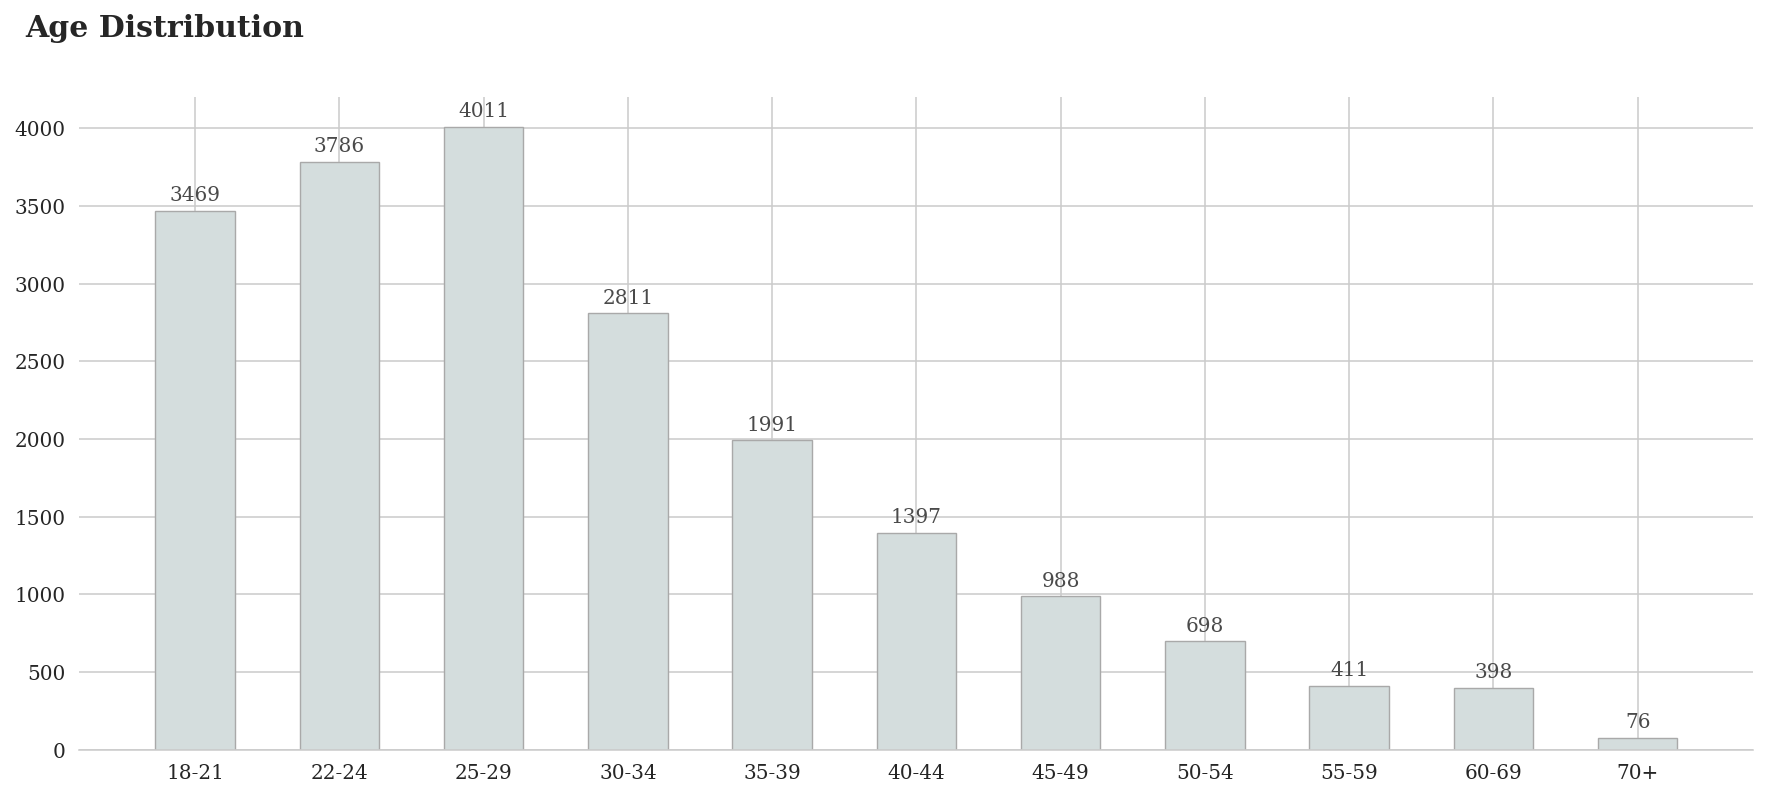

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
data_q1 = data['Q1'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=.55, edgecolor='darkgray', color='#d4dddd', linewidth=.7)

for i in data_q1.index:
  ax.annotate(data_q1[i], xy=(i, data_q1[i] + 100), va='center', ha='center',   ## xy= 글자 위치
              fontweight='light', fontfamily='serif', color='#4a4a4a')
  
for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_ylim(0, 4200)
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(np.arange(0, 4001, 500), fontfamily='serif')
fig.text(.1, .95, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')


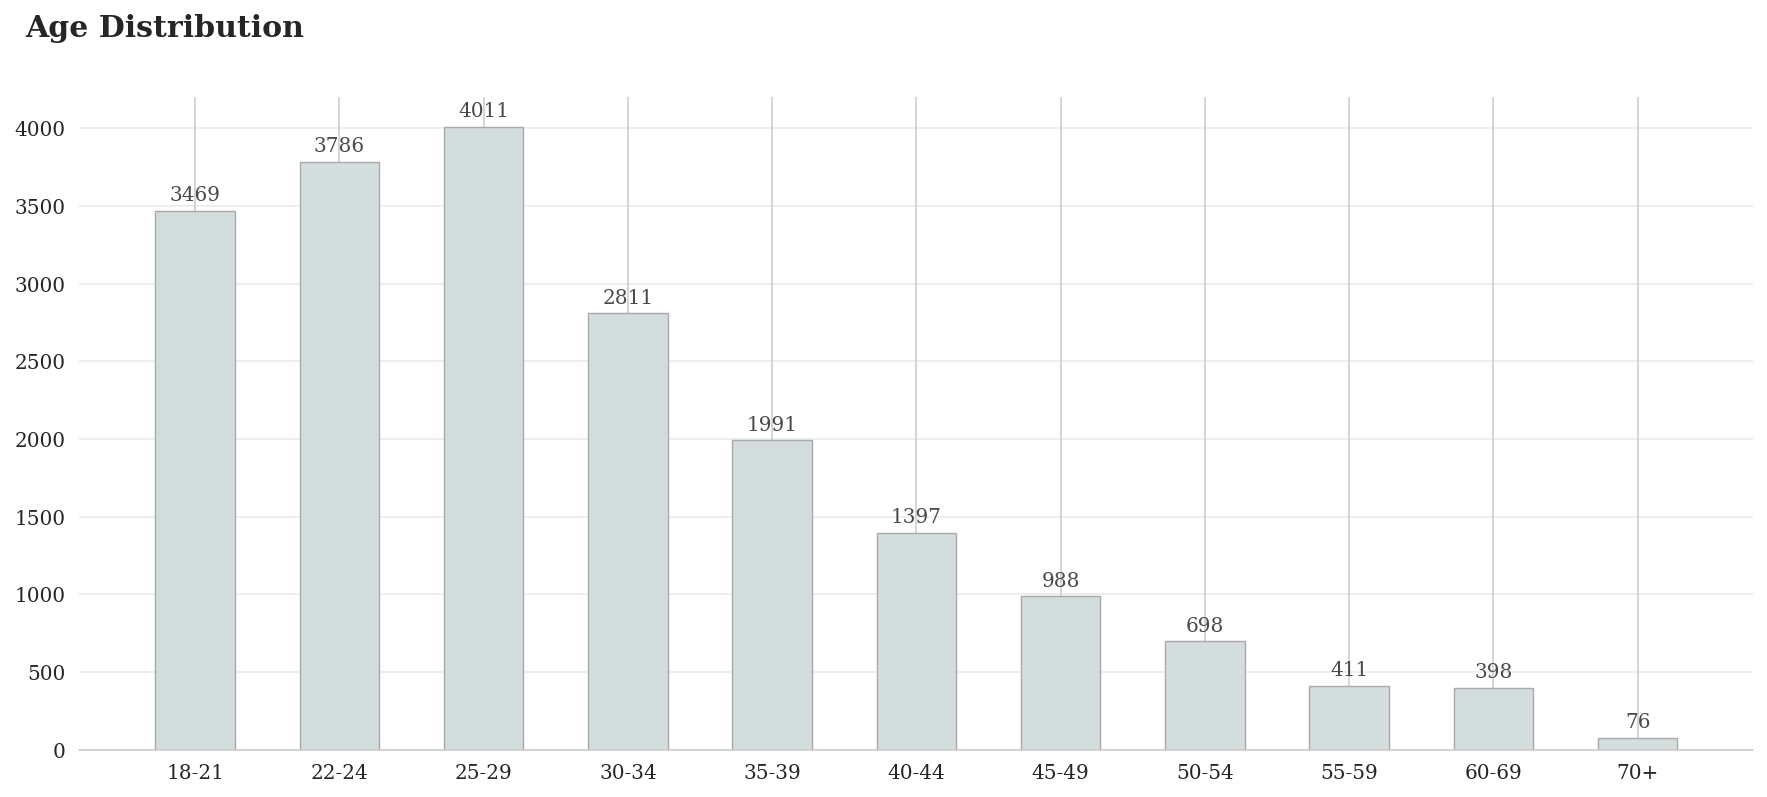

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
data_q1 = data['Q1'].value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55, edgecolor='darkgray', color='#d4dddd', linewidth=.7)

for i in data_q1.index:  ### Bar 글씨 옵션
  ax.annotate(data_q1[i], xy=(i, data_q1[i] + 100), va='center', ha='center',
              fontweight='light', fontfamily='serif', color='#4a4a4a')

for s in ['top', 'left', 'right']:   ### 격자 조정(바깥)
  ax.spines[s].set_visible(False)  

ax.set_ylim(0, 4200)
ax.set_xticklabels(data_q1.index, fontfamily='serif')
ax.set_yticklabels(range(0, 4001, 500), fontfamily='serif')
fig.text(0.1, 0.95, 'Age Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)

In [ ]:
## man  = data.groupby('Q2')['Q1'].value_counts().drop('ETC')['Man'].sort_index()
## woman = data.groupby('Q2)['Q1'].value_counts()['Woman'].sort_index()

Q1
18-21    2611
22-24    2838
25-29    3128
30-34    2246
35-39    1581
40-44    1153
45-49     840
50-54     605
55-59     353
60-69     362
70+        72
Name: Q1, dtype: int64

In [110]:
data.loc[(data.Q2 != 'Man')&(data.Q2 !='Woman'), 'Q2'] = 'ETC'

In [111]:
data.Q2.value_counts()

Man      15789
Woman     3878
ETC        369
Name: Q2, dtype: int64

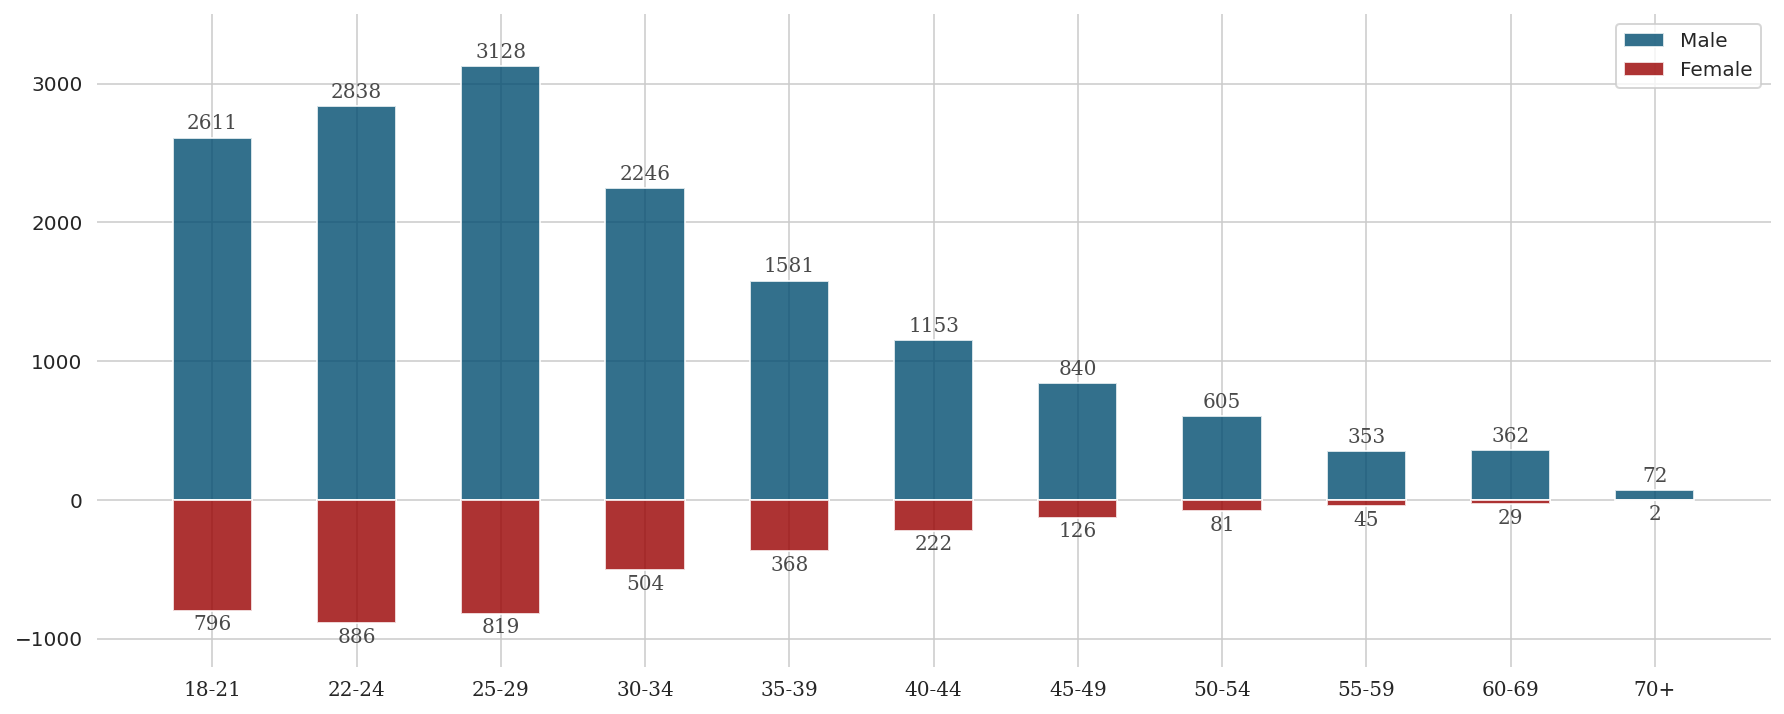

In [ ]:
data['Q2'] = data['Q2'].apply(lambda x: 'ETC' if x not in ['Man', 'Woman'] else x) 
data_q1q2 = data[data['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(man.index, man, width=.55, color='#004c70', alpha=.8, label='Male')
ax.bar(woman.index, woman, width=.55, color='#990000', alpha=.8, label='Female')
ax.set_ylim(-1200, 3500)

for x in man.index:
  ax.annotate(man[x], xy=(x, man[x] + 100), va='center', ha='center',    ## xy ==> 위치 xy(x,y) x,y좌표
              fontweight='light', fontfamily='serif', color='#4a4a4a')
  
for x in woman.index:
  ax.annotate(-woman[x], xy=(x, woman[x] - 100), va='center', ha='center',
              fontweight='light', fontfamily='serif', color='#4a4a4a')
  
for s in ['top', 'bottom', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(man.index, fontfamily='serif')
ax.legend()

Text(0.16, 0.95, 'Age / Gender Distribution')

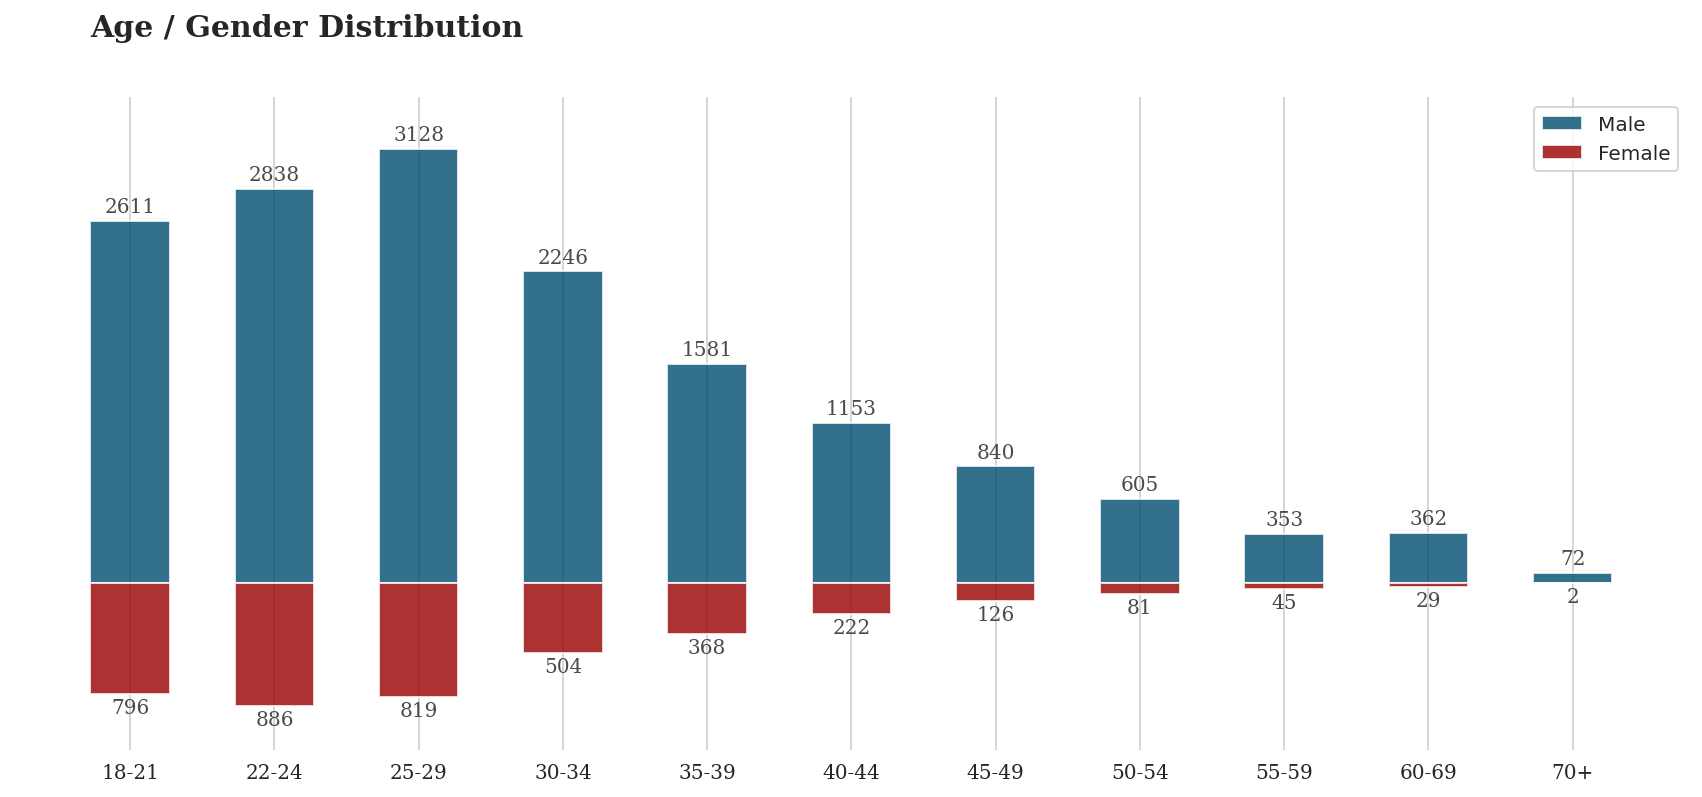

In [ ]:
data['Q2'] = data['Q2'].apply(lambda x: 'ETC' if x not in ['Man', 'Woman'] else x)
data_q1q2 = data[data['Q2'] != 'ETC'].groupby(['Q2'])['Q1'].value_counts().unstack().sort_index()
man = data_q1q2.loc['Man']
woman = -data_q1q2.loc['Woman']  ##밑으로 barplot을 하기 위해서

fig, ax = plt.subplots(1,1, figsize=(15,6))
ax.bar(man.index, man, width=.55, color='#004c70', alpha=.8, label='Male')
ax.bar(woman.index, woman, width=.55, color='#990000', alpha=.8, label='Female' )
ax.set_ylim(-1200, 3500)

for i in man.index:
  ax.annotate(f'{man[i]}', xy=(i, man[i] + 100),                                  
              va='center', ha='center', fontweight='light', fontfamily='serif', color='#4a4a4a')

for i in woman.index:
  ax.annotate(f'{-woman[i]}', xy=(i, woman[i] - 100), va='center', ha='center', fontfamily='serif',
              color='#4a4a4a')
  
for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q1q2.columns, fontfamily='serif')
ax.set_yticks([])
ax.legend()
fig.text(.16, .95, 'Age / Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')

In [ ]:
q3_order = data['Q3'].value_counts()[:11].drop('Other').index  ## 10개 국가중에 value_counts(), 'Other'는 드랍
data_q2q3 = data[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[q3_order]  ## 10개 국가
## data[['Q2', 'Q3]].groupby('Q3')['Q2'].value_counts(normalize=True).unstack().loc[q3_order] 와 같다.
data_q2q3['sum'] = data_q2q3.sum(axis=1) ## 'sum' 칼럼을 만들어 sum구간을 만든다. 정규화를 위해
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Man', 'Woman', 'ETC']].rename(
    index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'}
)[::-1] ## normalize 한것,     data_q2q3.T/data_q2q3['sum'] ==> 굉장히 고급기술

In [ ]:
a = list(q3_order)
a.append('South Korea')
a

['India',
 'United States of America',
 'Brazil',
 'Japan',
 'Russia',
 'United Kingdom of Great Britain and Northern Ireland',
 'Nigeria',
 'China',
 'Germany',
 'Turkey',
 'South Korea']

In [ ]:
data_q2q3c = data.groupby('Q3')['Q2'].value_counts().unstack().loc[a].rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland':'UK'}).astype(int).loc[::-1]
data_q2q3c ## annotate에 개수를 넣기 위한 변수데이터

Q2           ETC   Man  Woman
Q3                           
South Korea    1   150     39
Turkey         8   249     87
Germany       12   326     66
China         17   388     69
Nigeria        3   392     81
UK            12   386     91
Russia        11   491     80
Japan          6   590     42
Brazil         2   599     93
USA           74  1680    483
India         71  4491   1289

In [ ]:
q3_order = data['Q3'].value_counts()[:11].drop('Other').index
data_q2q3 = data[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts().unstack().loc[a]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Man', 'Woman', 'ETC']].rename(index={'United States of America':'USA', 'United Kingdom of Great Britain and Northern Ireland': 'UK'})[::-1]
data_q2q3_ratio

Q2                Man     Woman       ETC
Q3                                       
South Korea  0.789474  0.205263  0.005263
Turkey       0.723837  0.252907  0.023256
Germany      0.806931  0.163366  0.029703
China        0.818565  0.145570  0.035865
Nigeria      0.823529  0.170168  0.006303
UK           0.789366  0.186094  0.024540
Russia       0.843643  0.137457  0.018900
Japan        0.924765  0.065831  0.009404
Brazil       0.863112  0.134006  0.002882
USA          0.751006  0.215914  0.033080
India        0.767561  0.220304  0.012135

In [ ]:
data_q2q3

Q2                                                   ETC  ...     sum
India                                               71.0  ...  5851.0
United States of America                            74.0  ...  2237.0
Brazil                                               2.0  ...   694.0
Japan                                                6.0  ...   638.0
Russia                                              11.0  ...   582.0
United Kingdom of Great Britain and Northern Ir...  12.0  ...   489.0
Nigeria                                              3.0  ...   476.0
China                                               17.0  ...   474.0
Germany                                             12.0  ...   404.0
Turkey                                               8.0  ...   344.0

[10 rows x 4 columns]

In [ ]:
data.groupby('Q3')['Q2'].value_counts(normalize=True).unstack().loc[q3_order][['Man', 'Woman', 'ETC']].loc[::-1]

Q2                                                       Man  ...       ETC
Turkey                                              0.723837  ...  0.023256
Germany                                             0.806931  ...  0.029703
China                                               0.818565  ...  0.035865
Nigeria                                             0.823529  ...  0.006303
United Kingdom of Great Britain and Northern Ir...  0.789366  ...  0.024540
Russia                                              0.843643  ...  0.018900
Japan                                               0.924765  ...  0.009404
Brazil                                              0.863112  ...  0.002882
United States of America                            0.751006  ...  0.033080
India                                               0.767561  ...  0.012135

[10 rows x 3 columns]

In [ ]:
data[['Q2', 'Q3']].groupby('Q3')['Q2'].value_counts(normalize=True).unstack().loc[q3_order].T.sort_index(ascending=False).T[['Man', 'Woman', 'ETC']]

Q2                                                       Man  ...       ETC
India                                               0.767561  ...  0.012135
United States of America                            0.751006  ...  0.033080
Brazil                                              0.863112  ...  0.002882
Japan                                               0.924765  ...  0.009404
Russia                                              0.843643  ...  0.018900
United Kingdom of Great Britain and Northern Ir...  0.789366  ...  0.024540
Nigeria                                             0.823529  ...  0.006303
China                                               0.818565  ...  0.035865
Germany                                             0.806931  ...  0.029703
Turkey                                              0.723837  ...  0.023256

[10 rows x 3 columns]

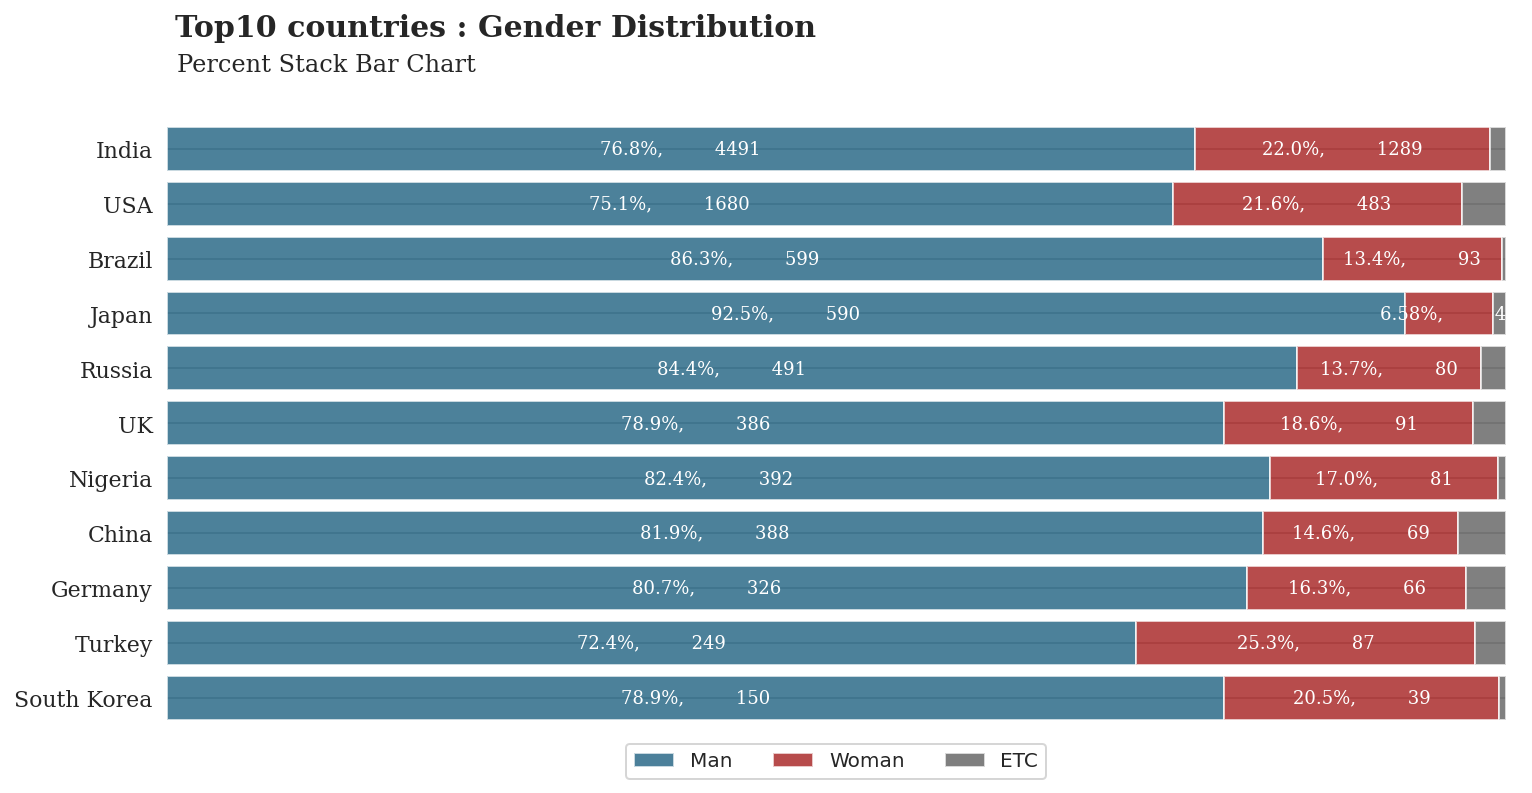

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'], color='#004c70', alpha=.7, label='Man')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Woman'], color='#990000', alpha=.7, label='Woman', left=data_q2q3_ratio['Man'])     ## left는 옆에 있는 데이터
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['ETC'], color='#4a4a4a', alpha=.7, label='ETC', left=data_q2q3_ratio['Man'] + data_q2q3_ratio['Woman'])

ax.set_xlim(0,1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

for i in data_q2q3_ratio.index:
  ax.annotate(f"{data_q2q3_ratio['Man'][i] * 100:.3}%,         {data_q2q3c['Man'][i]}", xy=(data_q2q3_ratio['Man'][i]/2, i),
              va='center', ha='center', fontsize=9, fontweight='light', fontfamily='serif', color='white')

for i in data_q2q3_ratio.index:
  ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%,         {data_q2q3c['Woman'][i]}", xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
              va='center', ha='center', fontsize=9, fontweight='light', fontfamily='serif', color='white')
  
fig.text(.13, .95, 'Top10 countries : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.131, .91, 'Percent Stack Bar Chart', fontsize=12, fontfamily='serif')

for s in ['top', 'bottom', 'left', 'right']:
  ax.spines[s].set_visible(False)

  ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(.5, -0.06))

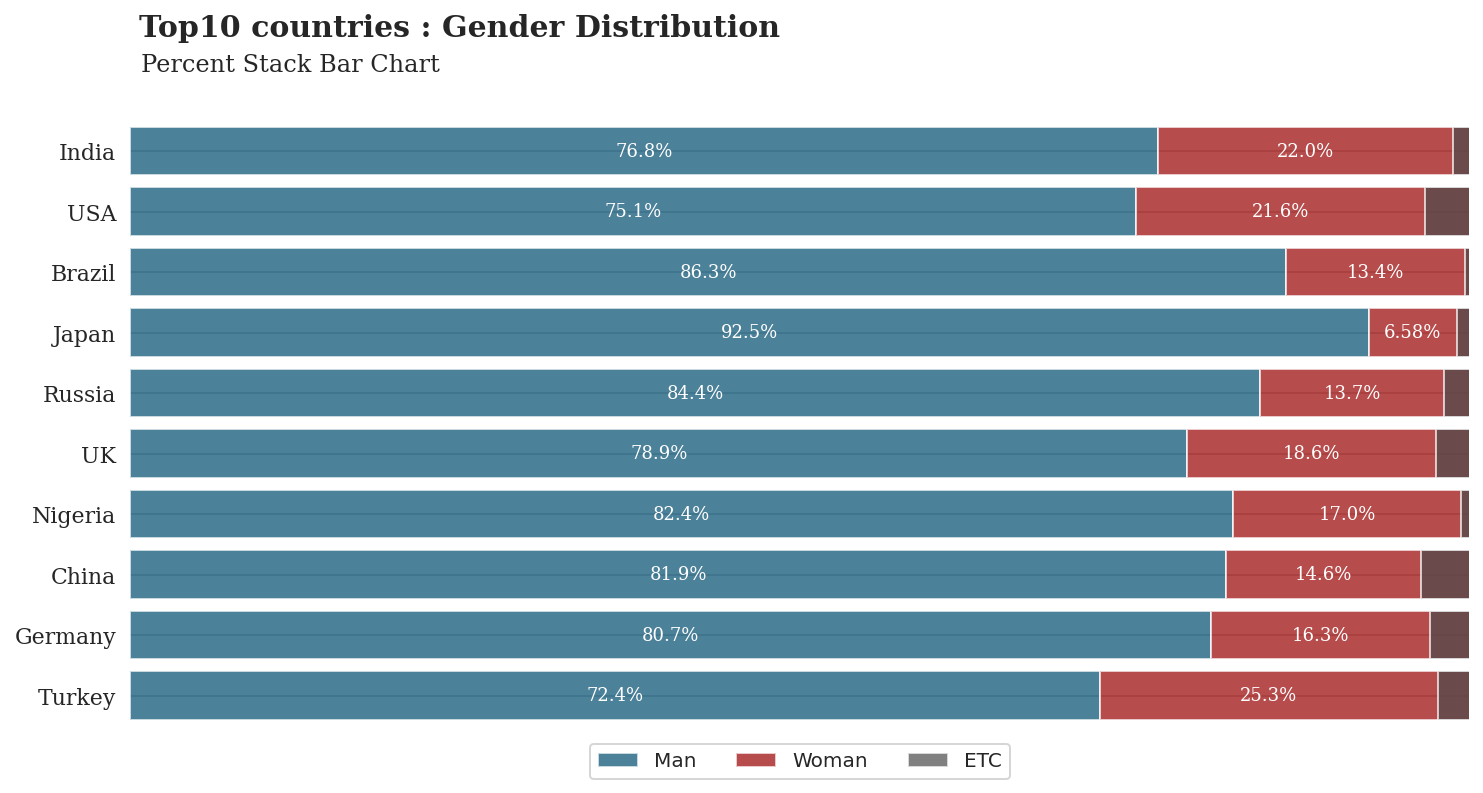

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Man'],
        color='#004c70', alpha=.7, label='Man')
ax.barh(data_q2q3_ratio.index, data_q2q3['Woman'],
        left=data_q2q3_ratio['Man'], color='#990000', alpha=.7, label='Woman') ## left를 사용 'Man' ==> 왼쪽에 'Man' 있다고
ax.barh(data_q2q3_ratio.index, data_q2q3['ETC'],
        left=data_q2q3_ratio['Man'] + data_q2q3_ratio['Woman'], color='#4a4a4a', ## left를 사용 'Man', 'Woman
        alpha=.7, label='ETC')

ax.set_xlim(0, 1) ## 이거 없으면 안됨 ==> x축을 없앰
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# Male 퍼센트
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Man'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Woman'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Man'][i]+data_q2q3_ratio['Woman'][i]/2, i),
                   va = 'center', ha='center',fontsize=9, fontweight='light', fontfamily='serif',
                   color='white')
  
fig.text(.13, .95, 'Top10 countries : Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(.131, .91, 'Percent Stack Bar Chart', fontsize=12, fontfamily='serif')

for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

  ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(.5, -0.06))

In [8]:
data_q4 = data['Q4'].value_counts()
data_q4    ## 학력별 value_counts() 변수

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

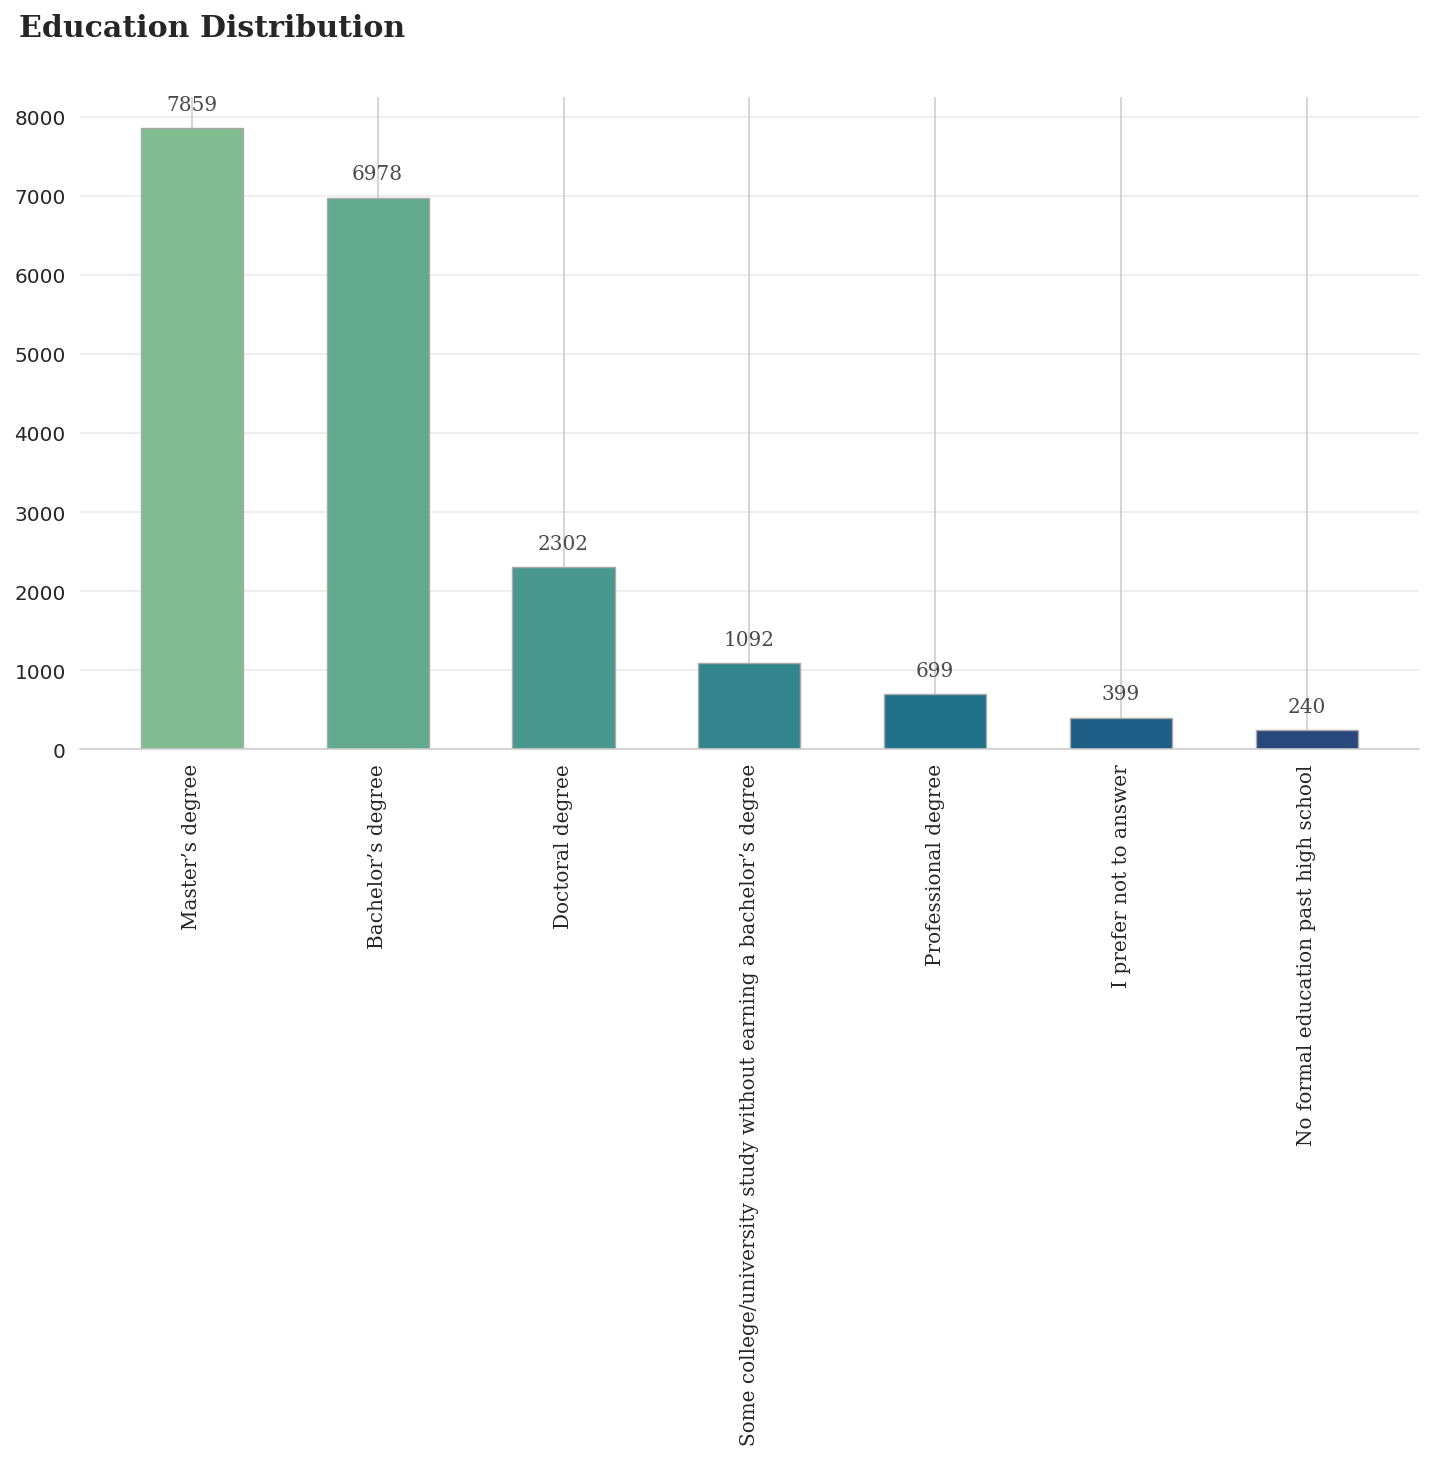

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.bar(data_q4.index, data_q4, width=.55, edgecolor='darkgray', color=sns.color_palette('crest', 7),
       linewidth=.7)

for x in data_q4.index:
  ax.annotate(f'{data_q4[x]}', xy=(x, data_q4[x] + 300), va='center', ha='center', fontweight='light',
              fontfamily='serif', color='#4a4a4a')
  
for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q4.index, fontfamily='serif', rotation=90)
fig.text(.09, .95, 'Education Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=.4)

In [27]:
q6_order = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
data_q6 = data['Q6'].value_counts()[q6_order]  ## 경력별 value_counts() 변수

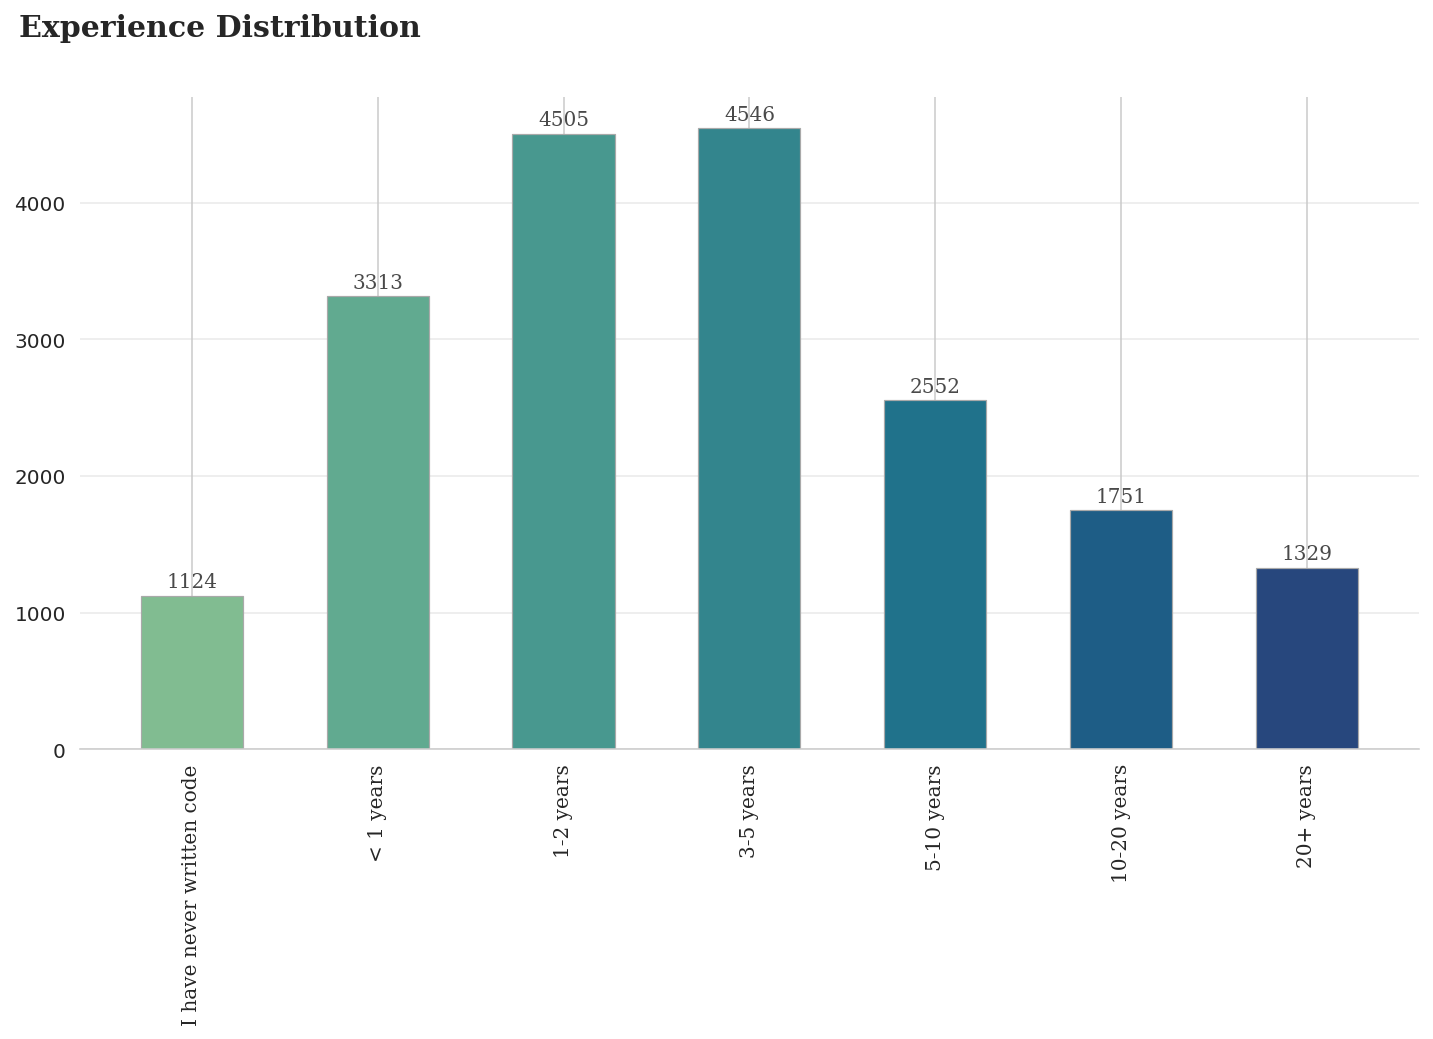

In [29]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.bar(data_q6.index, data_q6, width=.55, edgecolor='darkgray', color=sns.color_palette('crest', 7),
       linewidth=.6)

for i in data_q6.index:
  ax.annotate(f'{data_q6[i]}', xy=(i, data_q6[i] + 100), va='center', ha='center', fontweight='light',
              fontfamily='serif', color='#4a4a4a')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q6.index, fontfamily='serif', rotation=90)
fig.text(.09, .95, 'Experience Distribution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=.4)

In [56]:
q46_g = data.groupby('Q4')['Q6'].value_counts().sort_index().unstack().loc[:,q6_order]
q46_g = q46_g.astype(int).T    ## 히트맵 시각화를 위한 학력과 경력 groupby()와 unstack() 사용한 변수

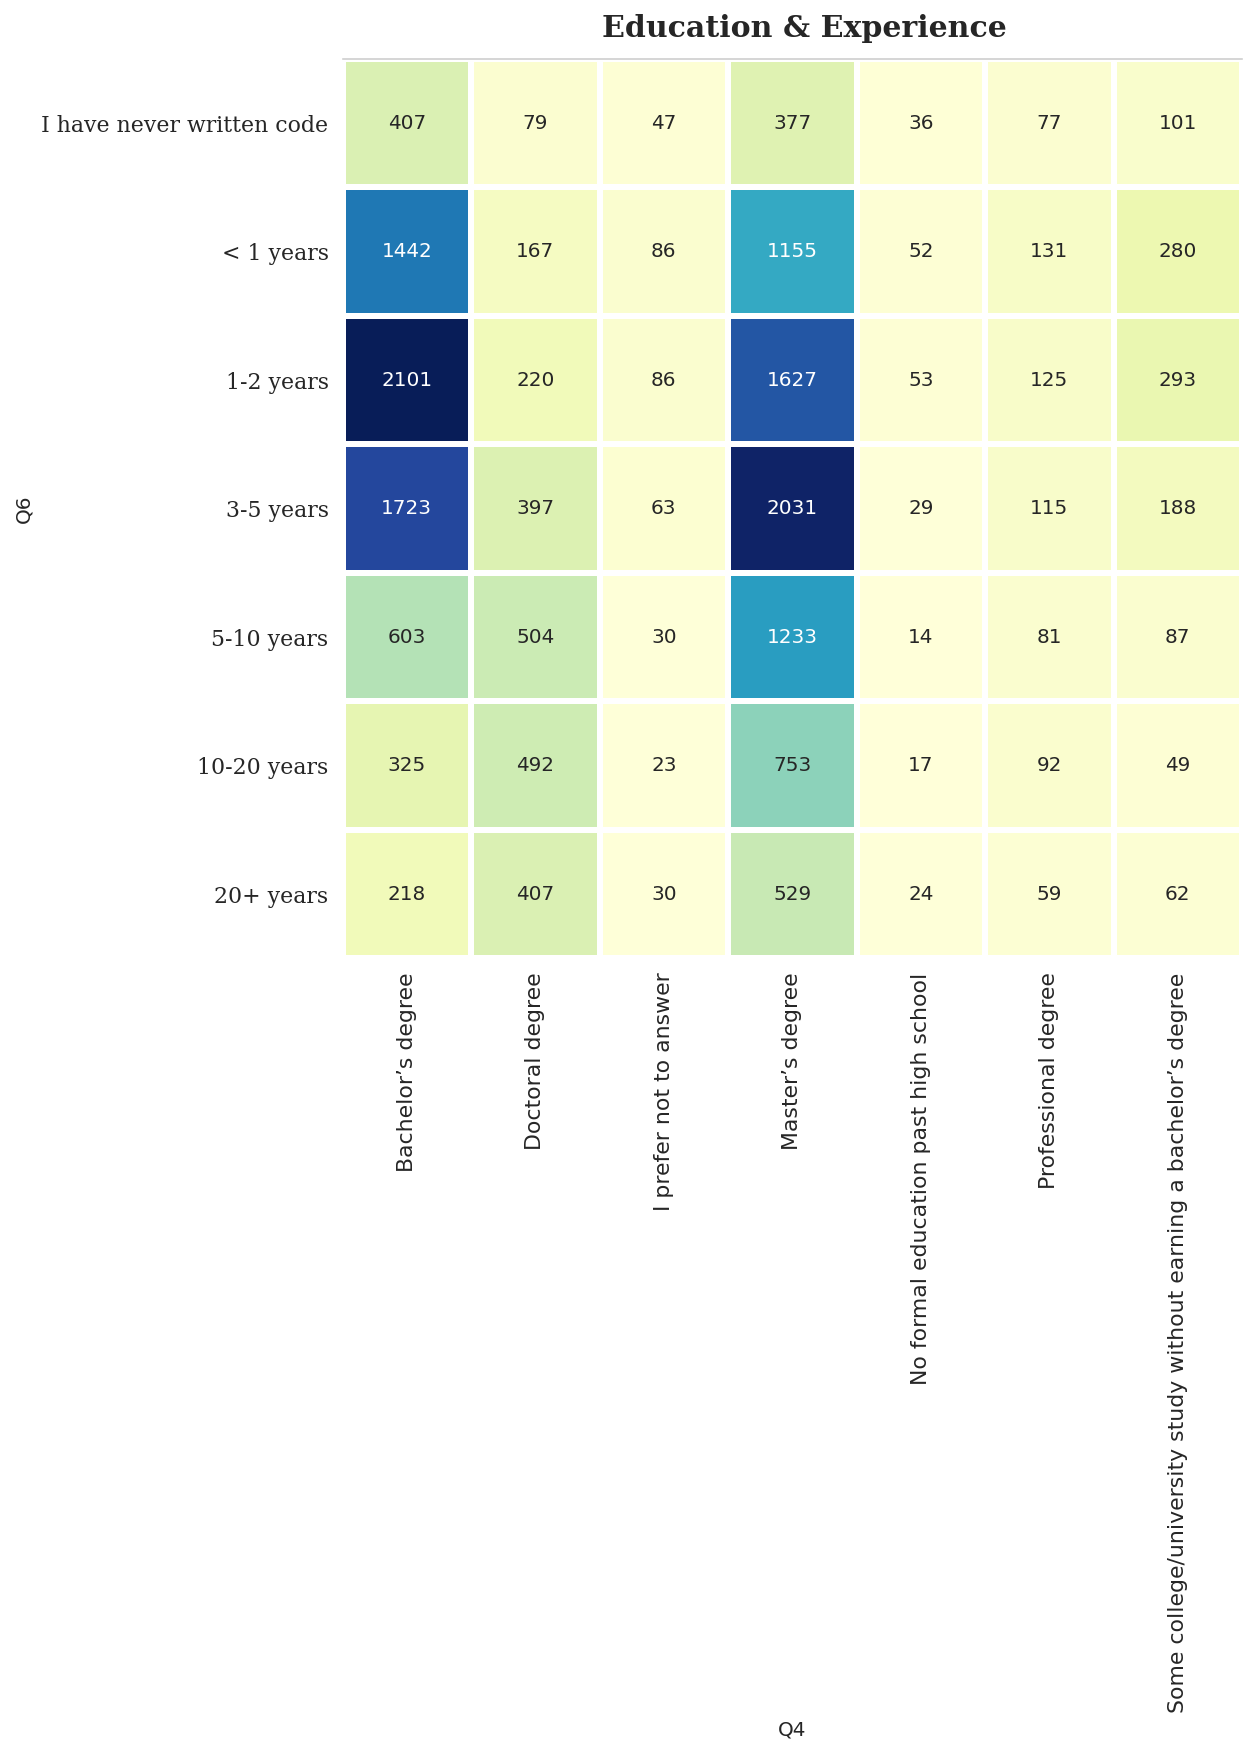

In [57]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(q46_g, cmap='YlGnBu', square=True, linewidths=2.5, cbar=False, annot=True, ax=ax, fmt='d')
ax.spines['top'].set_visible(True)

fig.text(.48, 1, 'Education & Experience', fontweight='bold', fontfamily='serif', fontsize=15)

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=11)
plt.tight_layout()

In [4]:
data_q14 = data[[i for i in data.columns if 'Q14' in i]]
data_q14_count = pd.Series(dtype='int')   ## 이렇게도 Series가 만들어지는구나 (dtype='int) 를 넣어서
for i in data_q14.columns:
  data_q14_count[data_q14[i].value_counts().index[0]] = data_q14[i].count()

In [82]:
data_q14_countc = pd.Series(dtype='int') 
for i in data_q14.columns:         ## 이렇게해도 위 for문하고 결과는 같다.
  data_q14_countc = data_q14_countc.append(data_q14[i].value_counts())

In [83]:
data_q14_countc

 Matplotlib                  12342
 Seaborn                      8821
 Plotly / Plotly Express      4130
 Ggplot / ggplot2             4120
 Shiny                        1137
 D3 js                         829
 Altair                        233
 Bokeh                         920
 Geoplotlib                    850
 Leaflet / Folium              596
None                          1897
Other                          565
dtype: int64

In [17]:
px.treemap(data_frame=data_q14_count, names=data_q14_count.index, values=data_q14_count, parents=['']*len(data_q14_count.index), color_discrete_sequence=sns.set_palette('Spectral'))
## plotly를 이용한 트리맵

In [66]:
data_q14_count

 Matplotlib                  12342
 Seaborn                      8821
 Plotly / Plotly Express      4130
 Ggplot / ggplot2             4120
 Shiny                        1137
 D3 js                         829
 Altair                        233
 Bokeh                         920
 Geoplotlib                    850
 Leaflet / Folium              596
None                          1897
Other                          565
dtype: int64

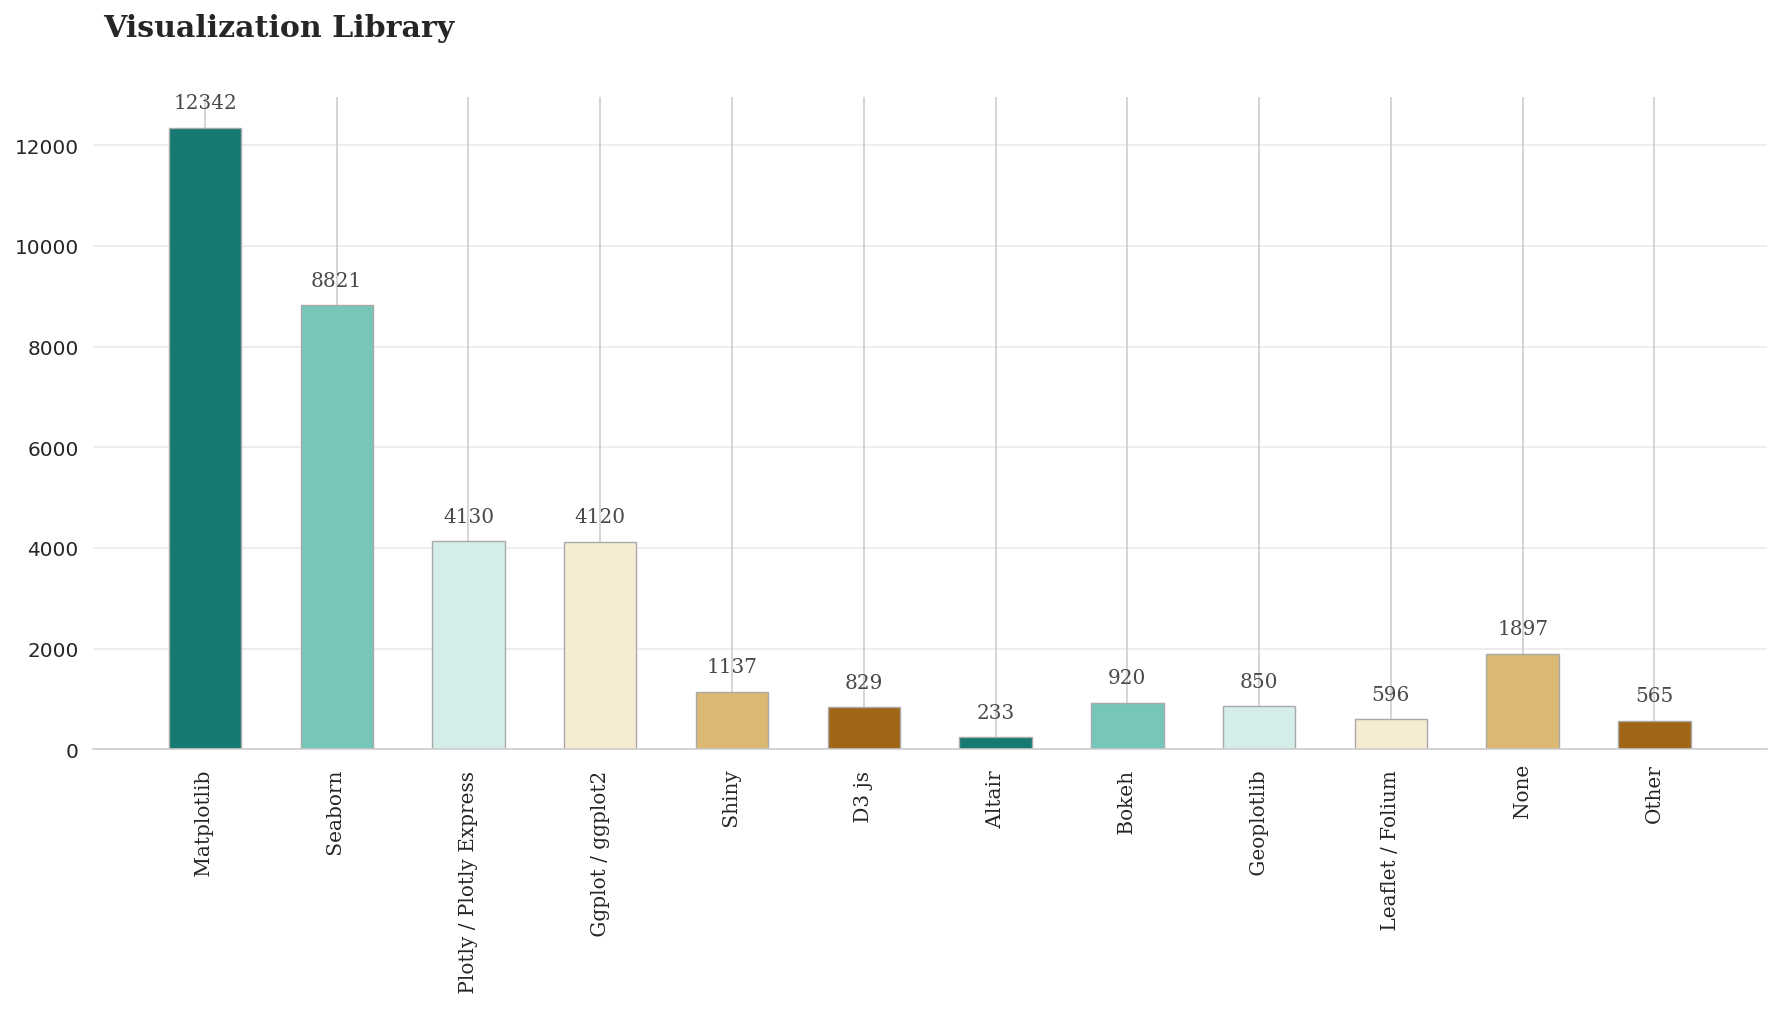

In [87]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(data_q14_count.index, data_q14_count, width=.55, edgecolor='darkgray', color=sns.color_palette('BrBG_r'),
       linewidth=.7)

for i in data_q14_count.index:
  ax.annotate(f'{data_q14_count[i]}', xy=(i, data_q14_count[i] + 500), va='center', ha='center',
              fontweight='light', fontfamily='serif', color='#4a4a4a')

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q14_count.index, rotation=90, fontfamily='serif')
fig.text(.13, .95, 'Visualization Library', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=.4)

In [97]:
q24_order = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999',
'10,000-14,999','15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999', '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999',
'100,000-124,999', '125,000-149,999',  '150,000-199,999', '200,000-249,999',  '250,000-299,999', '300,000-500,000', '> $500,000']
data_q24 = data['Q24'].value_counts()[q24_order]
data_q24   ## 연봉 value_counts() 변수

$0-999             2128
1,000-1,999         581
2,000-2,999         330
3,000-3,999         264
4,000-4,999         279
5,000-7,499         488
7,500-9,999         371
10,000-14,999       665
15,000-19,999       449
20,000-24,999       404
25,000-29,999       310
30,000-39,999       540
40,000-49,999       552
50,000-59,999       510
60,000-69,999       408
70,000-79,999       394
80,000-89,999       273
90,000-99,999       280
100,000-124,999     573
125,000-149,999     315
150,000-199,999     347
200,000-249,999     115
250,000-299,999      48
300,000-500,000      55
> $500,000           50
Name: Q24, dtype: int64

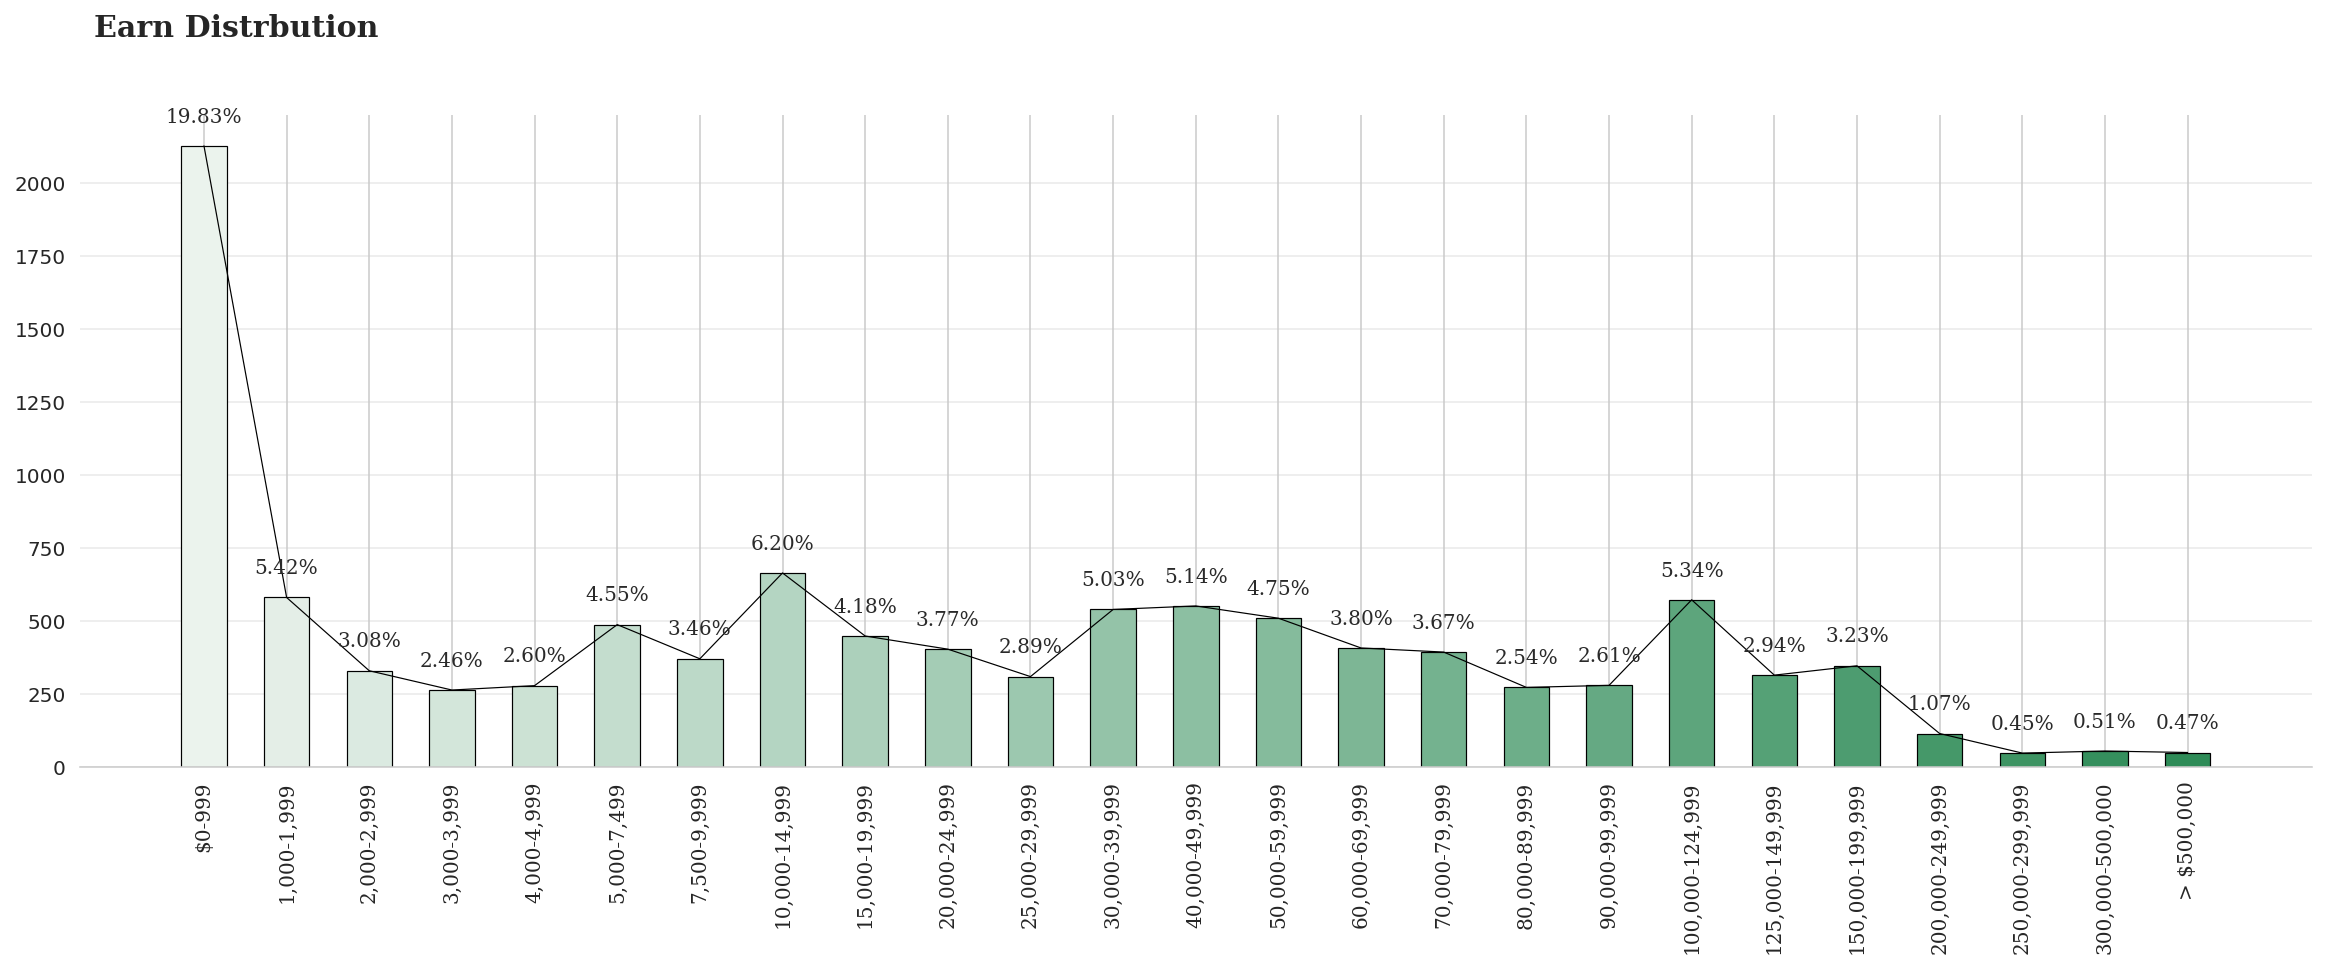

In [102]:
fig, ax = plt.subplots(figsize=(20,6))
ax.bar(data_q24.index, data_q24, width=.55, edgecolor='black', color=sns.light_palette('seagreen', len(data_q24)),
       linewidth=.6)
ax.plot(data_q24.index, data_q24, c='k', linewidth=.6)   ## lineplot을 추가해서 시각화

for i in data_q24.index:
  ax.annotate(f'{data_q24[i]/data_q24.sum()*100:.2f}%', xy=(i, data_q24[i] + 100), va='center', ha='center',
              fontweight='light', fontfamily='serif', color='#2a2a2a')   ## 주석 %로 출력할것

for s in ['top', 'left', 'right']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(data_q24.index, fontfamily='serif', rotation=90)
fig.text(.13, .97, 'Earn Distrbution', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=.4)

In [109]:
man = data[data['Q2']=='Man']['Q24'].value_counts()[q24_order]
woman = -data[data['Q2']=='Woman']['Q24'].value_counts()[q24_order]
woman

$0-999            -485
1,000-1,999       -120
2,000-2,999        -65
3,000-3,999        -45
4,000-4,999        -46
5,000-7,499        -84
7,500-9,999        -52
10,000-14,999      -88
15,000-19,999      -69
20,000-24,999      -60
25,000-29,999      -35
30,000-39,999      -72
40,000-49,999      -73
50,000-59,999      -58
60,000-69,999      -47
70,000-79,999      -39
80,000-89,999      -36
90,000-99,999      -37
100,000-124,999    -76
125,000-149,999    -35
150,000-199,999    -38
200,000-249,999     -9
250,000-299,999     -5
300,000-500,000     -4
> $500,000          -5
Name: Q24, dtype: int64

Text(0.16, 0.95, 'Earn&Gender Distribution')

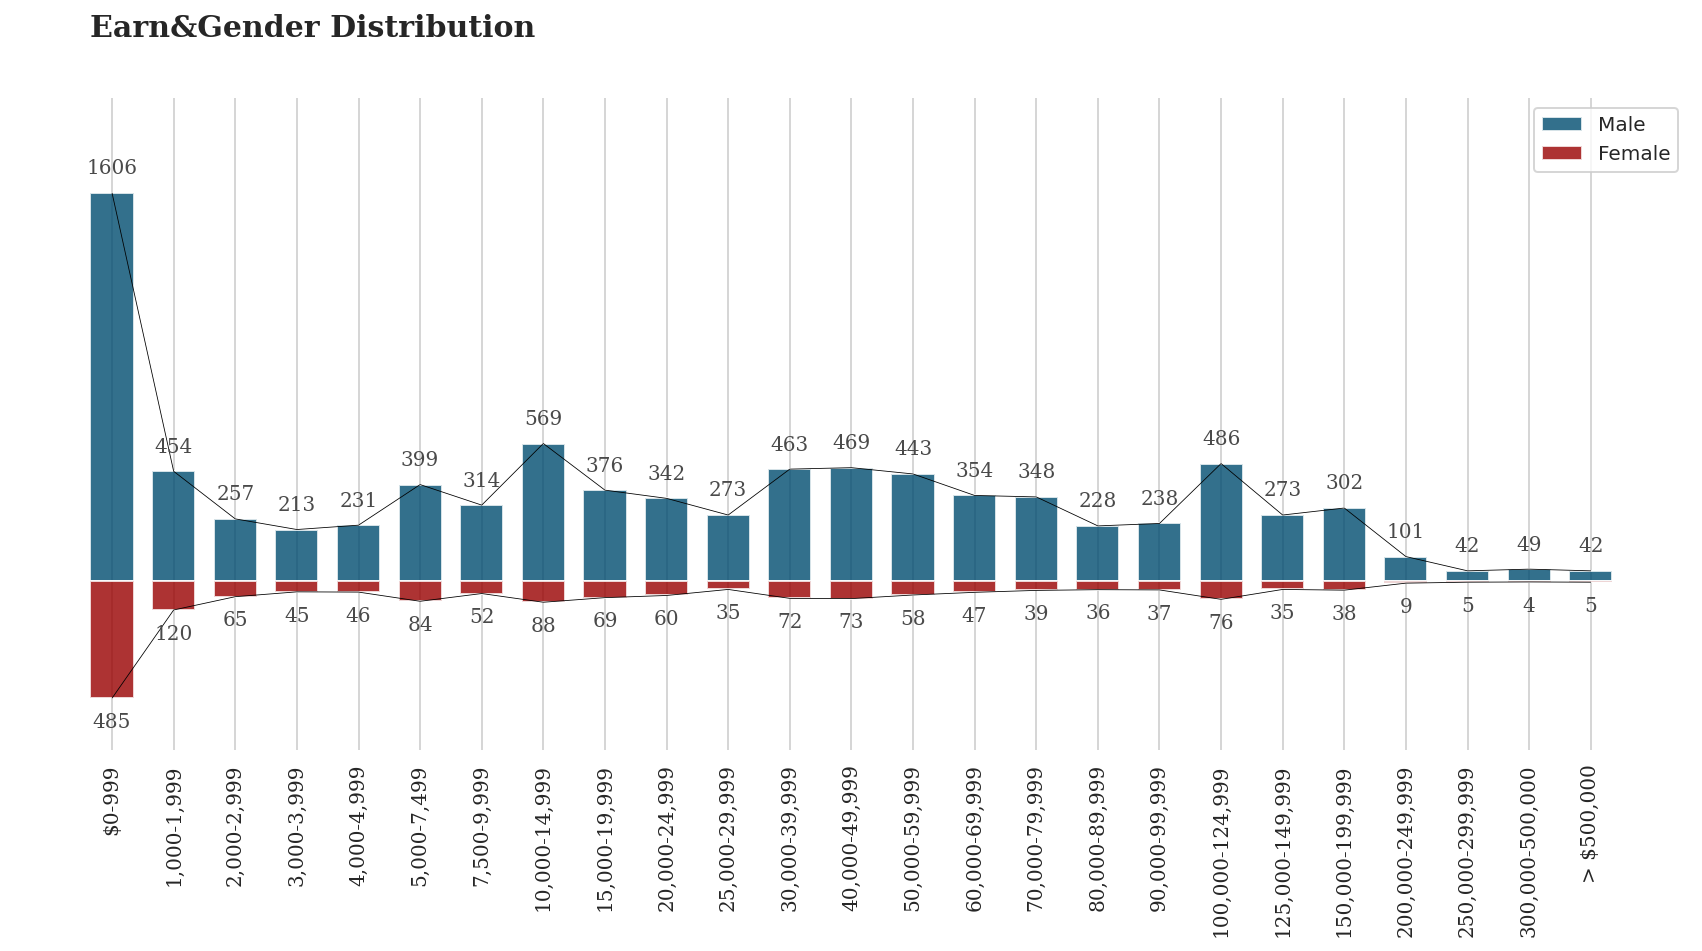

In [120]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(man.index, man, width=.7, color='#004c70', alpha=.8, label='Male')
ax.plot(man.index, man, c='k', linewidth=.4)
ax.bar(woman.index, woman, width=.7, color='#990000', alpha=.8, label='Female')
ax.plot(woman.index, woman, c='k', linewidth=.4)
ax.set_ylim(-700, 2000)

for i in man.index:
  ax.annotate(man[i], xy=(i, man[i] + 100), ha='center', va='center',
              fontweight='light', fontfamily='serif', color='#4a4a4a')
  
for i in woman.index:
  ax.annotate(-woman[i], xy=(i, woman[i] - 100), ha='center', va='center',
              fontweight='light', fontfamily='serif', color='#4a4a4a')
  
for s in ['top', 'left', 'right', 'bottom']:
  ax.spines[s].set_visible(False)

ax.set_xticklabels(man.index, fontfamily='serif', rotation=90)
ax.set_yticks([])
ax.legend()
fig.text(.16, .95, 'Earn&Gender Distribution', fontsize=15, fontweight='bold', fontfamily='serif')

In [ ]:
### 내가 해보기

In [ ]:
question = data.iloc[0]

In [ ]:
data.drop([0], axis=0, inplace=True)

질문 분리

In [ ]:
data = data.transpose()
data.reset_index(drop=True, inplace=True)

In [ ]:
data = data.set_index([0])

In [ ]:
data = data.transpose()

In [ ]:
##################### 데이터 컬럼 바꾸기 #################################

In [ ]:
data.shape

(20036, 355)

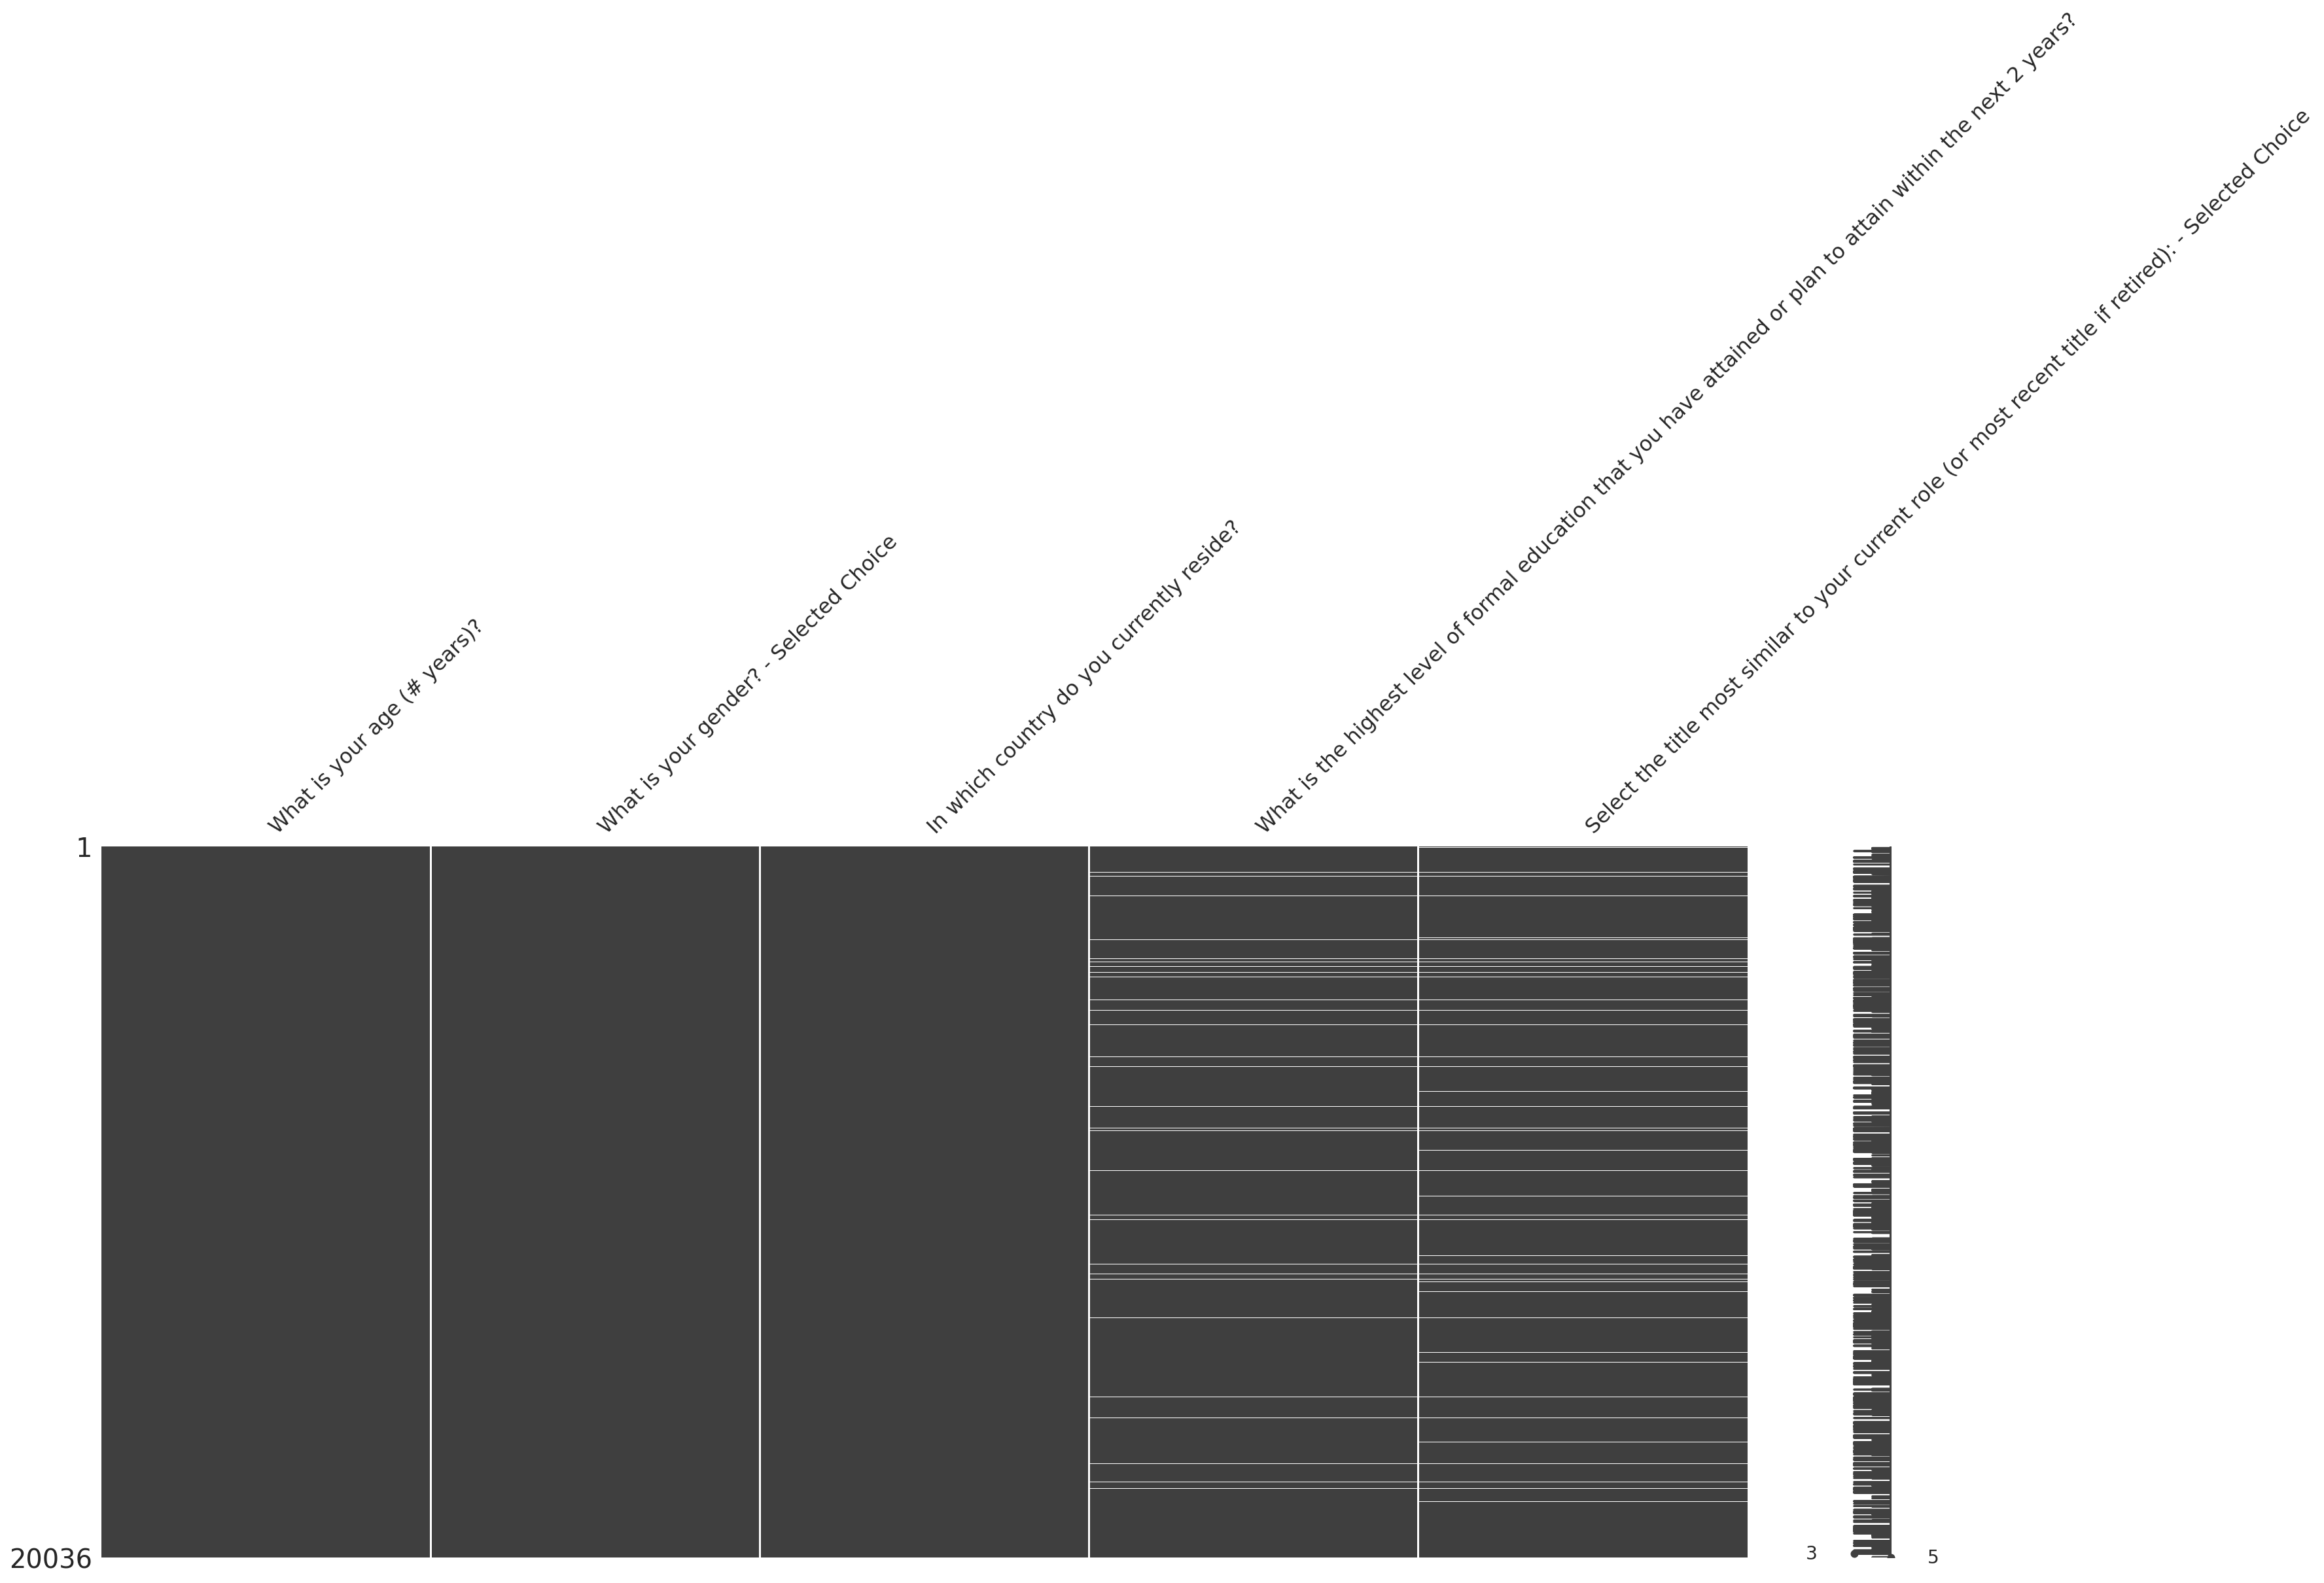

In [ ]:
msno.matrix(data.iloc[:,1:6])

In [ ]:
g_d = data['What is your gender? - Selected Choice']
g_d_c = g_d.value_counts()

Text(0.5, 1.0, 'Bar plot')

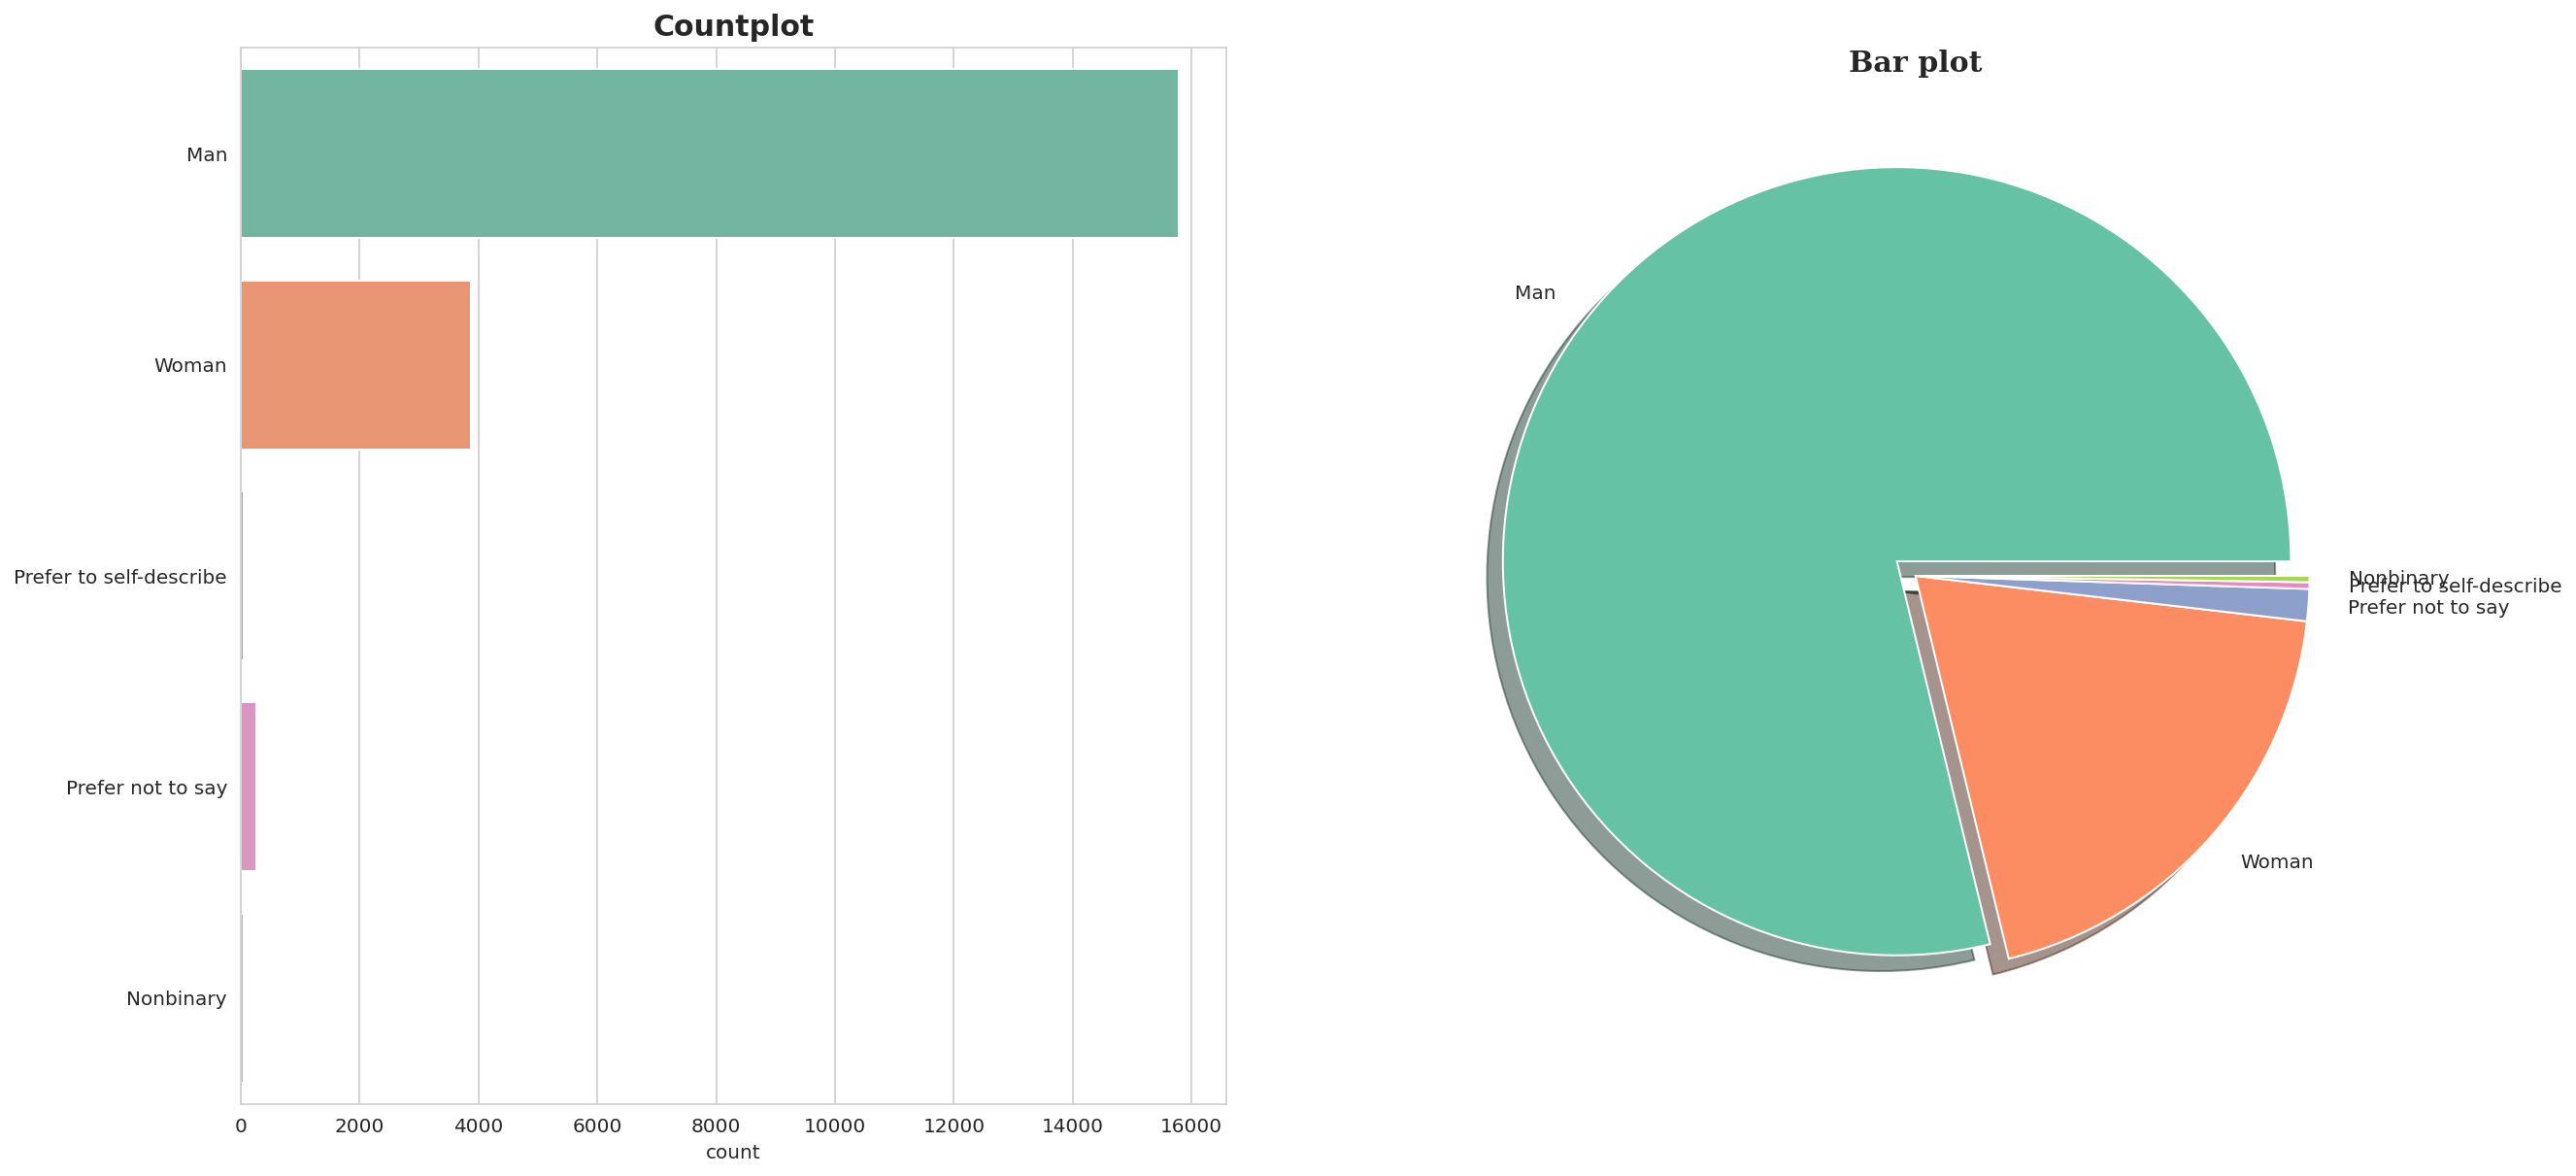

In [ ]:
f, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(y=data['What is your gender? - Selected Choice'], ax=ax[0], palette='Set2')
ax[0].set_title('Countplot', fontsize=15, fontweight='bold')
ax[0].set_ylabel('')
plt.pie(g_d_c.values, labels=g_d_c.index, explode=[0.06,0,0,0,0], colors=sns.color_palette('Set2', n_colors=20), shadow=True)
plt.title('Bar plot', fontsize=15, fontweight='bold', fontfamily='serif')

In [ ]:
  data['What is your gender? - Selected Choice'].value_counts(dropna=False, normalize=True)

Man                        0.788032
Woman                      0.193552
Prefer not to say          0.013126
Prefer to self-describe    0.002695
Nonbinary                  0.002595
Name: What is your gender? - Selected Choice, dtype: float64

In [ ]:
pip install plotly.express

  Using cached https://files.pythonhosted.org/packages/d4/d6/8a2906f51e073a4be80cab35cfa10e7a34853e60f3ed5304ac470852a08d/plotly_express-0.4.1-py2.py3-none-any.whl


In [ ]:
g_c_a = data['In which country do you currently reside?'].value_counts().reset_index(name='counts')
g_c_a.columns = ['country', 'counts']

In [ ]:
g_c

What is your gender? - Selected Choice  ... counts
0                                      Man  ...   4491
1                                      Man  ...   1680
2                                      Man  ...   1092
3                                      Man  ...    599
4                                      Man  ...    590
..                                     ...  ...    ...
183                                  Woman  ...     10
184                                  Woman  ...     10
185                                  Woman  ...      8
186                                  Woman  ...      7
187                                  Woman  ...      6

[188 rows x 3 columns]

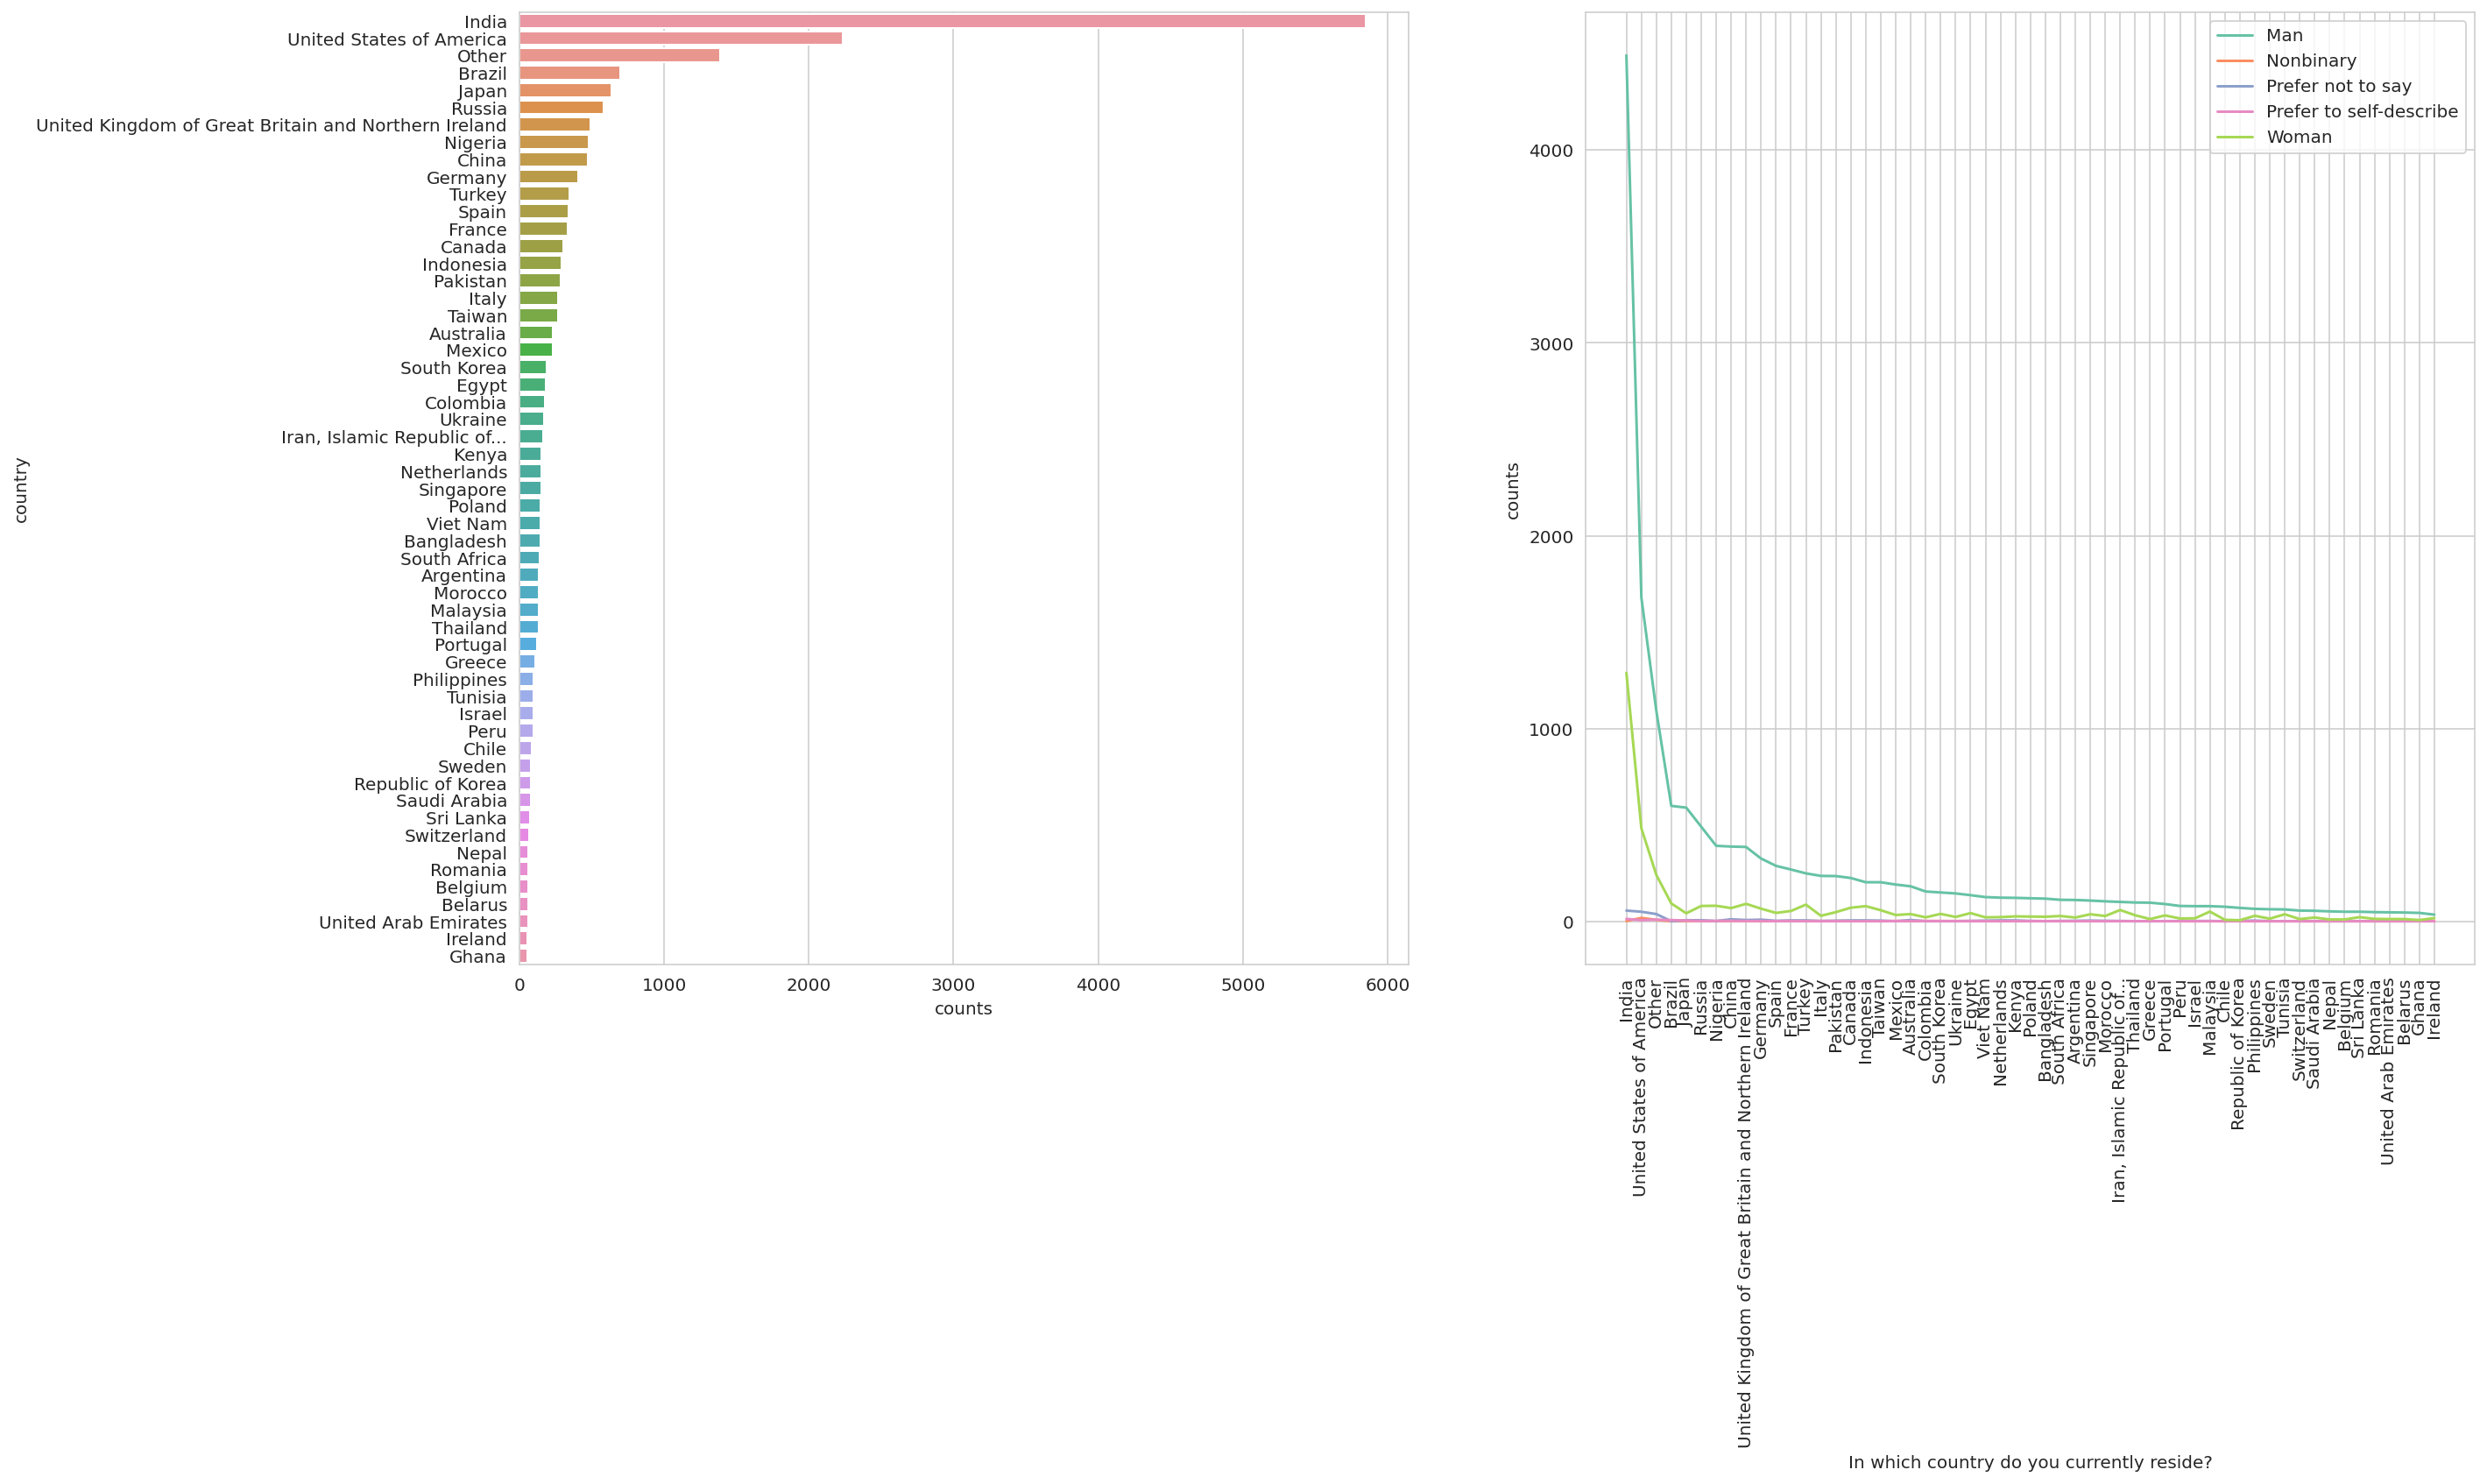

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
sns.barplot(y=g_c_a['country'], x=g_c_a['counts'], ax=ax[0])
sns.lineplot(x=g_c['In which country do you currently reside?'], y=g_c['counts'], hue=g_c['What is your gender? - Selected Choice'], ax=ax[1])
ax[1].set_xticklabels(g_c['In which country do you currently reside?'], rotation=90)
ax[1].legend()

In [ ]:
g_c_a

country  counts
0                                               India    5851
1                            United States of America    2237
2                                               Other    1388
3                                              Brazil     694
4                                               Japan     638
5                                              Russia     582
6   United Kingdom of Great Britain and Northern I...     489
7                                             Nigeria     476
8                                               China     474
9                                             Germany     404
10                                             Turkey     344
11                                              Spain     336
12                                             France     330
13                                             Canada     301
14                                          Indonesia     290
15                                           Pakistan     283
16                                              Italy     267
17                                             Taiwan     267
18                                          Australia     231
19                                             Mexico     227
20                                        South Korea     190
21                                              Egypt     179
22                                           Colombia     177
23                                            Ukraine     170
24                       Iran, Islamic Republic of...     162
25                                              Kenya     153
26                                        Netherlands     151
27                                          Singapore     149
28                                             Poland     148
29                                           Viet Nam     147
30                                         Bangladesh     143
31                                       South Africa     141
32                                          Argentina     134
33                                            Morocco     133
34                                           Malaysia     133
35                                           Thailand     132
36                                           Portugal     122
37                                             Greece     111
38                                        Philippines      99
39                                            Tunisia      99
40                                             Israel      97
41                                               Peru      95
42                                              Chile      85
43                                             Sweden      78
44                                  Republic of Korea      76
45                                       Saudi Arabia      76
46                                          Sri Lanka      72
47                                        Switzerland      68
48                                              Nepal      62
49                                            Romania      61
50                                            Belgium      60
51                                            Belarus      59
52                               United Arab Emirates      59
53                                            Ireland      54
54                                              Ghana      52

In [ ]:
fig = px.choropleth(g_c_a, locations='country', locationmode='country names', color='counts', color_continuous_scale=px.colors.sequential.deep)
fig.update_layout(title='All Countries') ## 모든 나라 비교

In [ ]:
g_c = data.groupby('What is your gender? - Selected Choice')['In which country do you currently reside?'].value_counts().reset_index(name='counts')
g_c

ValueError: ignored

In [ ]:
fig = px.choropleth(g_c, locations='In which country do you currently reside?', color='counts',
                    locationmode='country names', animation_frame='What is your gender? - Selected Choice', color_continuous_scale=px.colors.sequential.OrRd)
fig.update_layout(title='Comparison by country') ## plotly 완성

In [ ]:
data = data.T.reset_index(drop=True).set_index([0]).T

In [ ]:
country_g = ['United States of America', 'India', 'South Korea']

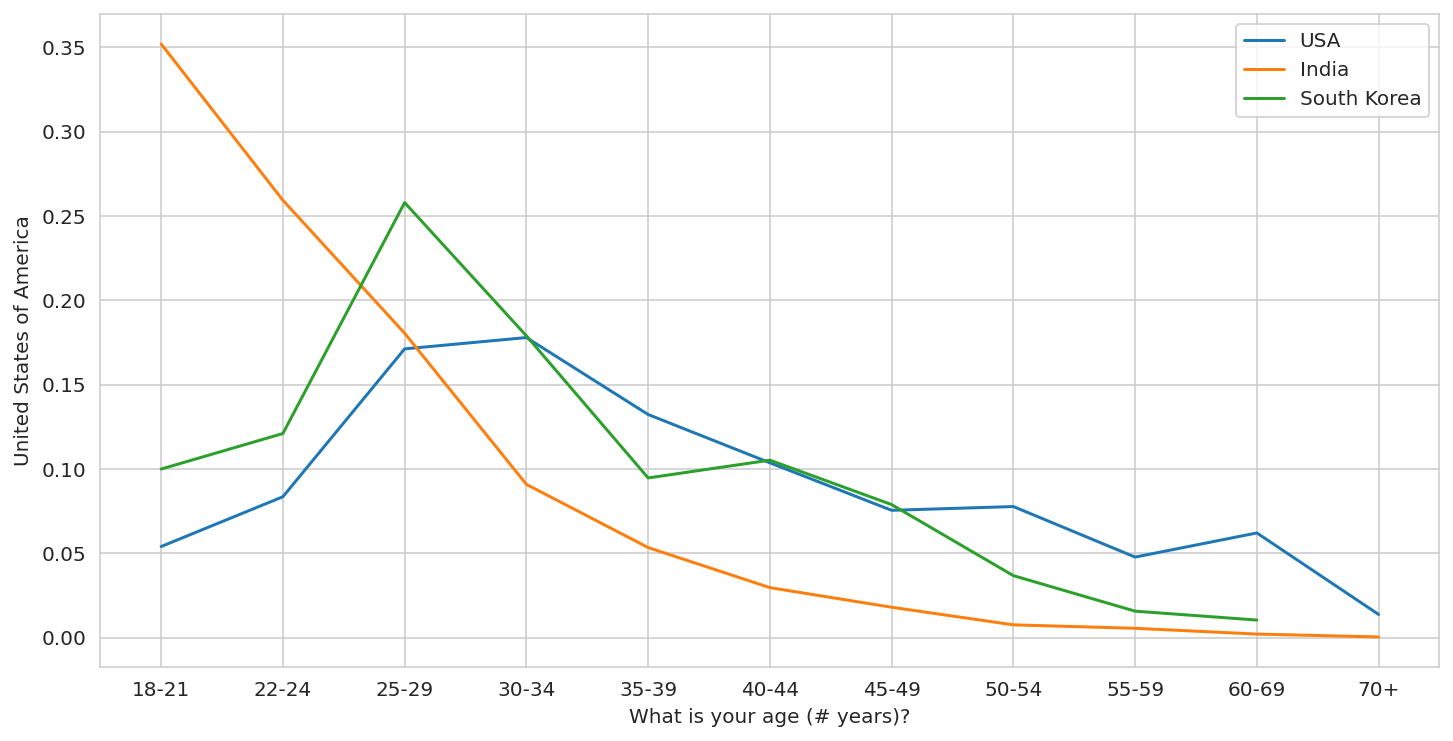

In [ ]:
plt.figure(figsize=(12,6))   ## 나이별 비율로만 본 시각화
sns.lineplot(ga1.index, ga1['United States of America'], label='USA')
sns.lineplot(ga1.index, ga1['India'], label='India')
sns.lineplot(ga1.index, ga1['South Korea'], label='South Korea')

In [ ]:
ga1 = data.groupby('In which country do you currently reside?')['What is your age (# years)?'].value_counts(normalize=True)[country_g].sort_index() ## gender와 age를 groupby한 변수
ga1 = ga1.unstack().T

In [ ]:
ga1['United States of America']

What is your age (# years)?
18-21    0.054090
22-24    0.083594
25-29    0.171211
30-34    0.177917
35-39    0.132320
40-44    0.103710
45-49    0.075548
50-54    0.077783
55-59    0.047832
60-69    0.062137
70+      0.013858
Name: United States of America, dtype: float64

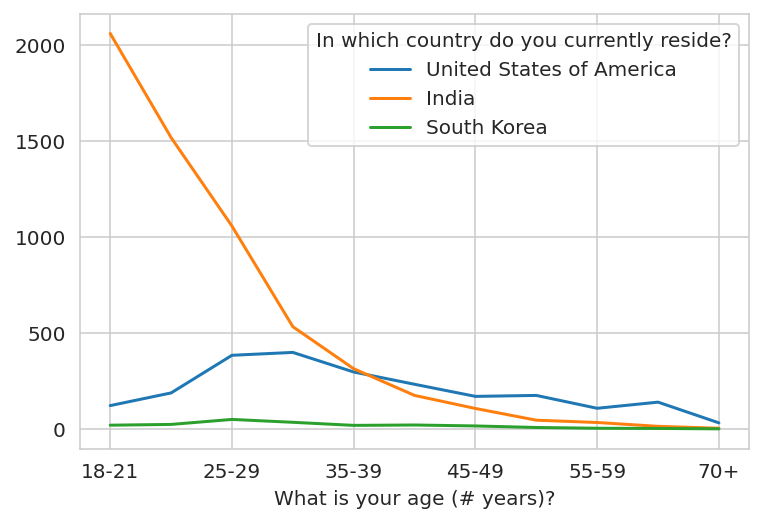

In [ ]:
data.groupby('In which country do you currently reside?')['What is your age (# years)?'].value_counts()[country_g].unstack().fillna(0).astype(int).T.plot.line()    ## 관심국가별 나이 그래프

In [ ]:
data.iloc[:,100:200]

0     Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Other  ... Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?  (Select all that apply) - Selected Choice -  H20 Driverless AI  
1                                                    NaN                                                                             ...                                                NaN                                                                                                                                
2                                                    NaN                                                                             ...                                                NaN                                                                                                                                
3                                                    NaN                                                                             ...                                                NaN                                                                                                                                
4                                                    NaN                                                                             ...                                                NaN                                                                                                                                
5                                                    NaN                                                                             ...                                                NaN                                                                                                                                
...                                                  ...                                                                             ...                                                ...                                                                                                                                
20032                                                NaN                                                                             ...                                                NaN                                                                                                                                
20033                                                NaN                                                                             ...                                                NaN                                                                                                                                
20034                                                NaN                                                                             ...                                                NaN                                                                                                                                
20035                                                NaN                                                                             ...                                                NaN                                                                                                                                
20036                                                NaN                                                                             ...                                                NaN                                                                                                                                

[20036 rows x 100 columns]

In [ ]:
data.groupby('Select the title most similar to your current role (or most recent title if retired): - Selected Choice')['Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions', 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data', 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas', 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build and/or run a machine learning service that operationally improves my product or workflows', 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Experimentation and iteration to improve existing ML models', 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Do research that advances the state of the art of machine learning', 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - None of these activities are an important part of my role at work', 'Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other'].count()
### 직업별 하는 일들 count()

0                                                   Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions  ...  Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Other
Select the title most similar to your current r...                                                                                                                                                                                                 ...                                                                                                                              
Business Analyst                                                                                  547                                                                                                                                              ...                                                 21                                                                           
Currently not employed                                                                              0                                                                                                                                              ...                                                  0                                                                           
DBA/Database Engineer                                                                              44                                                                                                                                              ...                                                  6                                                                           
Data Analyst                                                                                     1053                                                                                                                                              ...                                                 64                                                                           
Data Engineer                                                                                     244                                                                                                                                              ...                                                 18                                                                           
Data Scientist                                                                                   1872                                                                                                                                              ...                                                 88                                                                           
Machine Learning Engineer                                                                         449                                                                                                                                              ...                                                 51                                                                           
Other                                                                                             652                                                                                                                                              ...                                                105                                                                           
Product/Project Manager                                                                           352                                                                                                                                              ...                        

In [ ]:
### 한국인만 따로 되어있는 데이터를 만들어서 그래프를 해보자 ###

In [ ]:
kor_data = data[data['In which country do you currently reside?'] == 'South Korea']
kor_data.shape    ## 190명이 응답했다.

(190, 355)

In [ ]:
### 한국인 학력 가지고 그래프

In [ ]:
kor_d['Student']

48

In [ ]:
kor_d = kor_data['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts().astype(int)

In [ ]:
fig, ax= plt.subplots(figsize=(14,6))
ax.barh(kor_d, kor_d.index)
for x in kor_d.index:
  ax.annotate(f'{kor_d[x]}', xy=(kor_d[x]+100, x), ha='center', va='center')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe8cb907950> (for post_execute):


ConversionError: ignored

ConversionError: ignored

<Figure size 1008x432 with 1 Axes>

In [ ]:
f, ax = plt.subplots(1,1, figsize=(12,6))
sns.barplot(x=kor_data['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().index, y=kor_data['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts(), alpha=0.8)
for x in kor_data['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().index:
  plt.annotate(kor_data['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts()[x],
               xy=(x, kor_data['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts()[x] + 100), ha='center', va='center')
plt.xticks(rotation=75)
plt.title('Korean Degree', fontfamily='serif', fontsize=15, pad=20, fontweight='bold')
plt.ylabel('')

Text(0, 0.5, '')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fe8cb907950> (for post_execute):


ConversionError: ignored

ConversionError: ignored

<Figure size 864x432 with 1 Axes>

In [ ]:
kor_data['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts()['Master’s degree']

56

Text(0.5, 51.85846153846151, '')

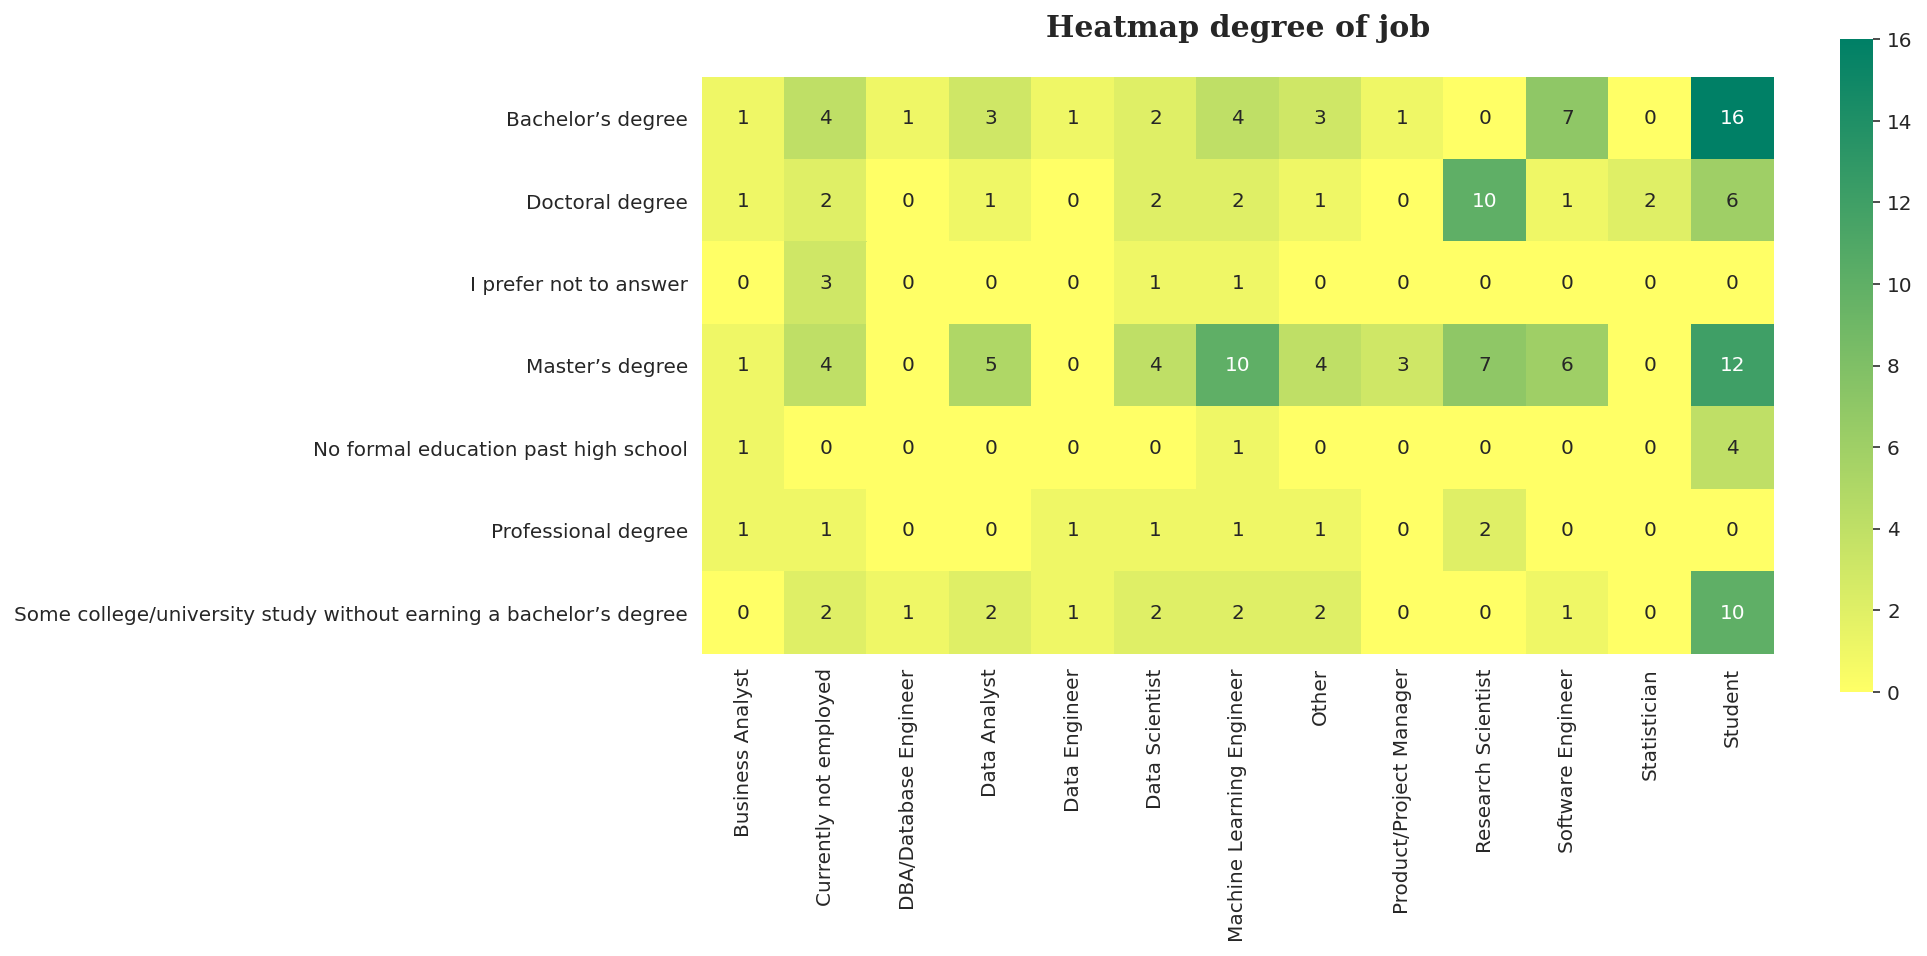

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(kor_data.groupby('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'].value_counts().unstack().fillna(0),
            annot=True, cmap='summer_r', square=True)  ## unstack() 하면 히트맵 그리기 쉽네
plt.title('Heatmap degree of job', pad=20, fontweight='bold', fontfamily='serif', fontsize=15)
plt.ylabel('')
plt.xlabel('')

In [ ]:
kor_j

What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  ... counts
0                                   Bachelor’s degree                                                               ...     16
1                                   Bachelor’s degree                                                               ...      7
2                                   Bachelor’s degree                                                               ...      4
3                                   Bachelor’s degree                                                               ...      4
4                                   Bachelor’s degree                                                               ...      3
5                                   Bachelor’s degree                                                               ...      3
6                                   Bachelor’s degree                                                               ...      2
7                                   Bachelor’s degree                                                               ...      1
8                                   Bachelor’s degree                                                               ...      1
9                                   Bachelor’s degree                                                               ...      1
10                                  Bachelor’s degree                                                               ...      1
11                                    Doctoral degree                                                               ...     10
12                                    Doctoral degree                                                               ...      6
13                                    Doctoral degree                                                               ...      2
14                                    Doctoral degree                                                               ...      2
15                                    Doctoral degree                                                               ...      2
16                                    Doctoral degree                                                               ...      2
17                                    Doctoral degree                                                               ...      1
18                                    Doctoral degree                                                               ...      1
19                                    Doctoral degree                                                               ...      1
20                                    Doctoral degree                                                               ...      1
21                             I prefer not to answer                                                               ...      3
22                             I prefer not to answer                                                               ...      1
23                             I prefer not to answer                                                               ...      1
24                                    Master’s degree                                                               ...     12
25                                    Master’s degree                                                               ...     10
26                                    Master’s degree                                                               ...      7
27                                    Master’s degree                                                               ...      6
28                                    Master’s degree                                                               ...      5
29                                    Master’s degree                                                               ...      4
30                                    Master’s degree             

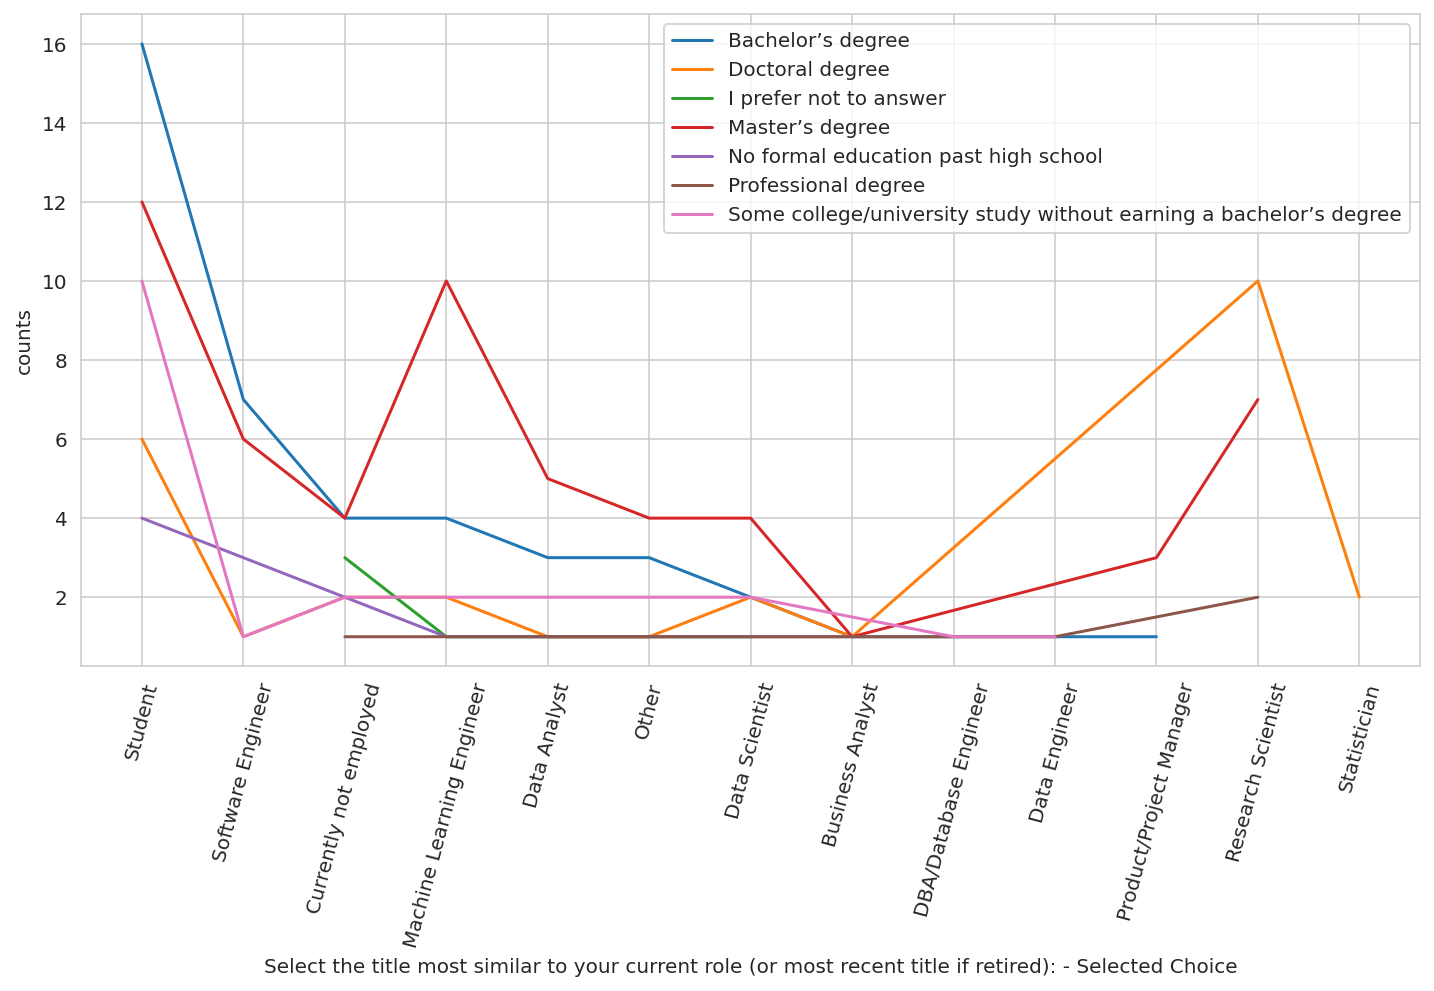

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=kor_j['Select the title most similar to your current role (or most recent title if retired): - Selected Choice'], y=kor_j['counts'], hue=kor_j['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'])
plt.xticks(rotation=(75))
plt.legend()

Text(0.5, 33.0, '')

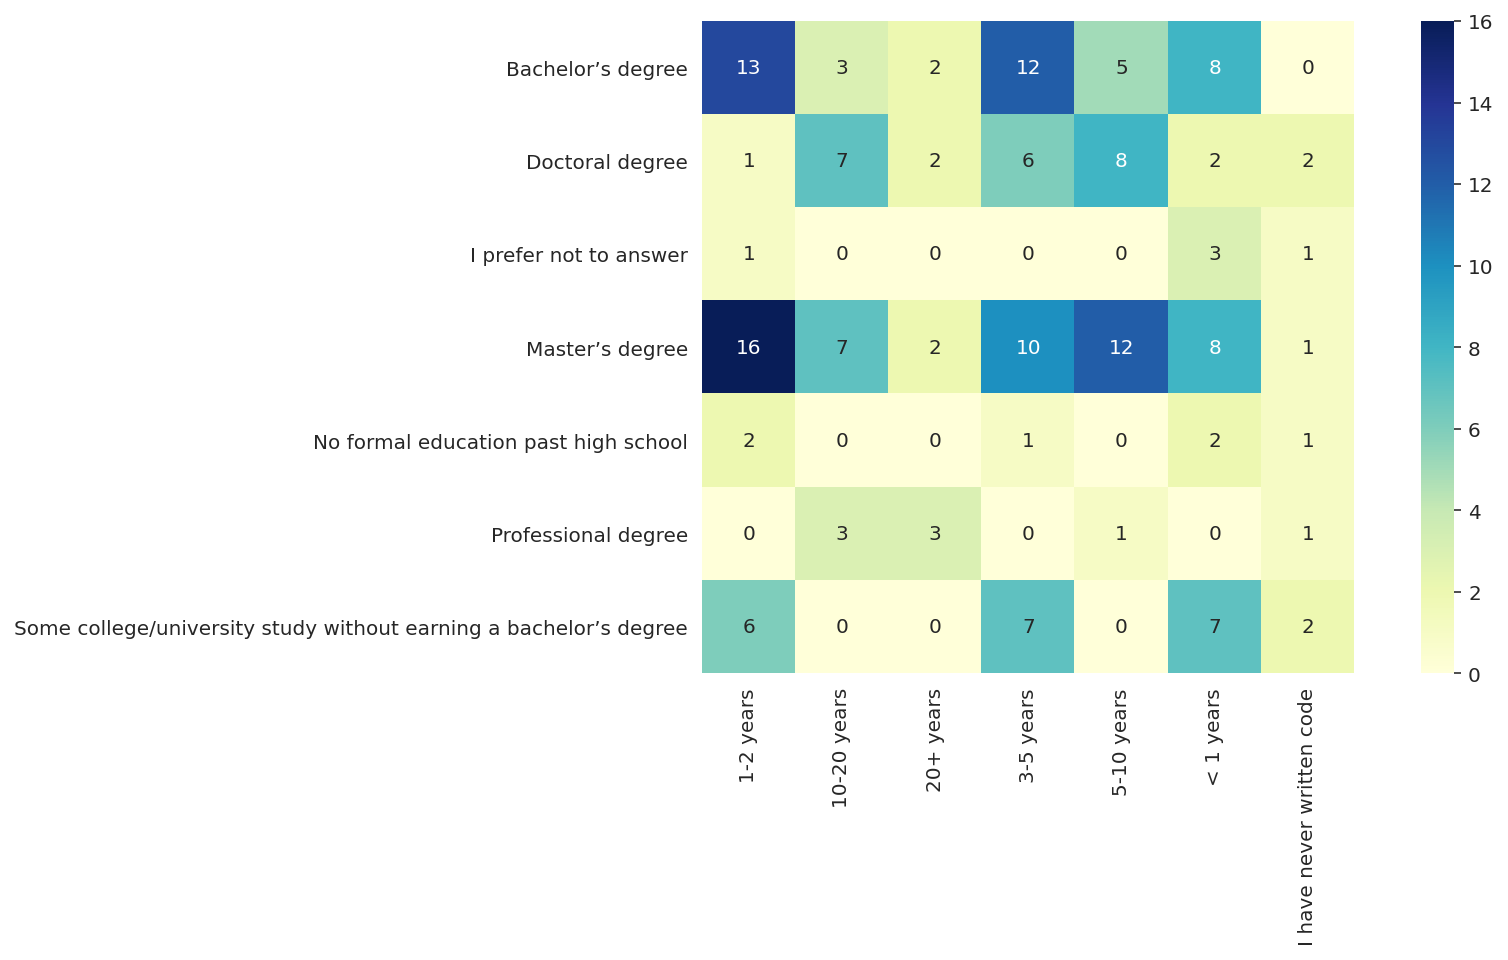

In [ ]:
plt.figure(figsize=(12,6))  ## 프로그래밍 경력별 학력
sns.heatmap(kor_data.groupby('What is the highest level of formal education that you have attained or plan to attain within the next 2 years?')['For how many years have you been writing code and/or programming?'].value_counts().unstack().fillna(0),
            annot=True, cmap='YlGnBu', square=True)
plt.ylabel('')
plt.xlabel('')

Text(0.5, 1.0, 'Age and Degree')

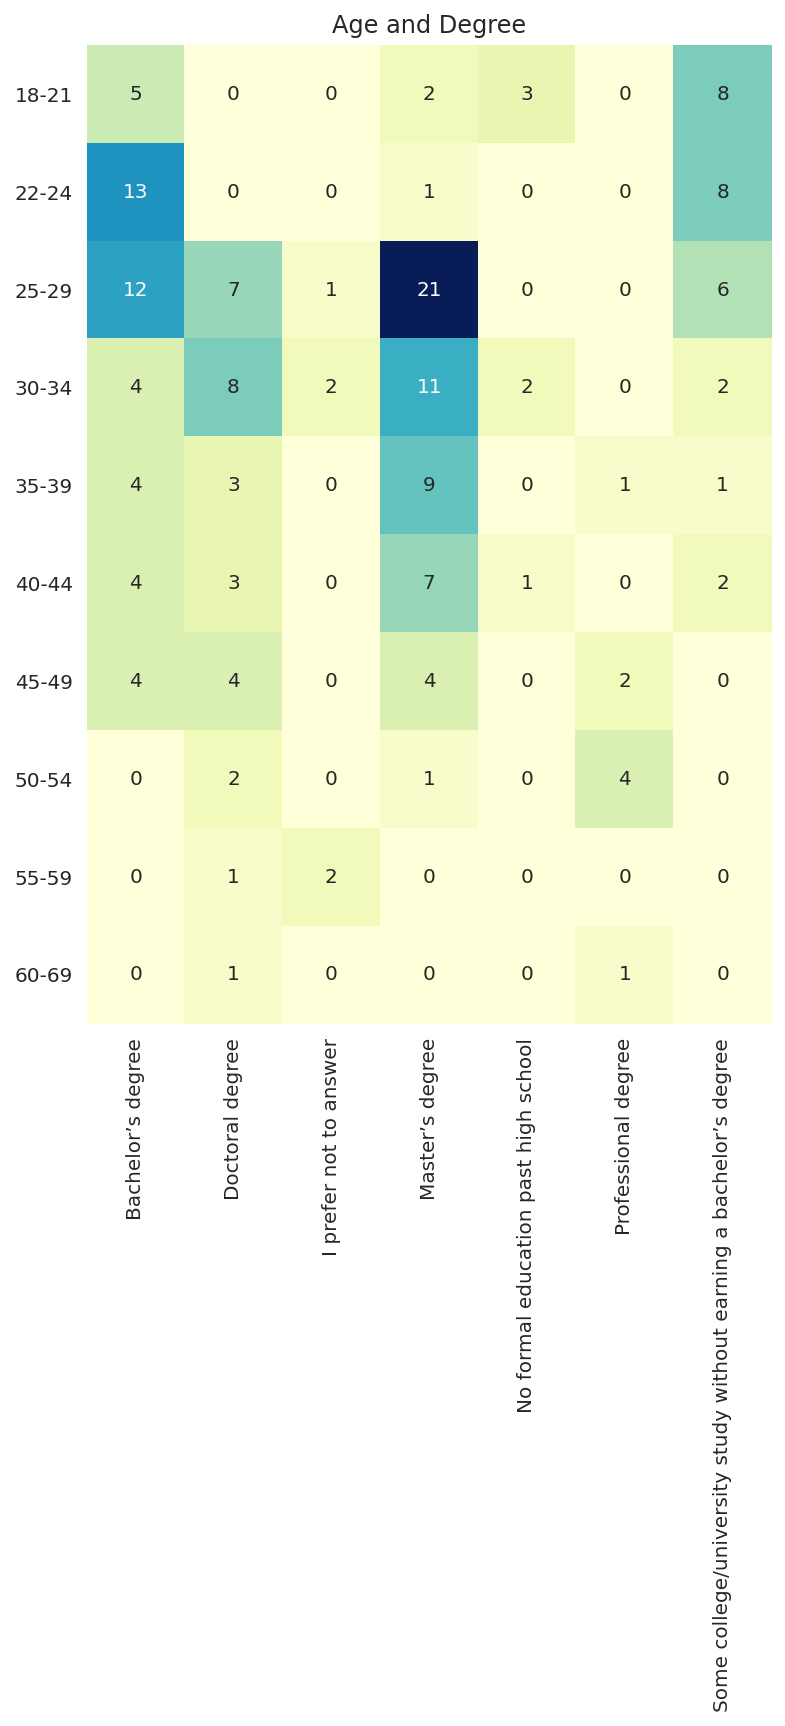

In [ ]:
plt.figure(figsize=(18,9))
sns.heatmap(kor_data.groupby('What is your age (# years)?')['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().unstack().fillna(0).astype(int),
            annot=True, cmap='YlGnBu', square=True, cbar=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks(rotation=360)
plt.title('Age and Degree', )

In [ ]:
kor_data[(kor_data['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?']=='Master’s degree')&(kor_data['What is your age (# years)?']=='25-29')].iloc[:,:]

0     Duration (in seconds)  ... In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other
39                      592  ...                                                NaN                                                                                                             
1279                     96  ...                                                NaN                                                                                                             
2575                   1653  ...                                                NaN                                                                                                             
3947                    500  ...                                                NaN                                                                                                             
4080                   2422  ...                                                NaN                                                                                                             
4205                    541  ...                                                NaN                                                                                                             
4748                    491  ...                                                NaN                                                                                                             
5956                    759  ...                                                NaN                                                                                                             
6876                   1984  ...                                                NaN                                                                                                             
7172                    662  ...                                                NaN                                                                                                             
8509                    217  ...                                                NaN                                                                                                             
8750                    507  ...                                                NaN                                                                                                             
11378                   545  ...                                                NaN                                                                                                             
12024                  6208  ...                                                NaN                                                                                                             
12169                   167  ...                                                NaN                                                                                                             
12879                   491  ...                                                NaN                                                                                                             
15249                   449  ...                                                NaN                                                                                                             
16687                   292  ...                                                NaN                                                                                                             
18205                   641  ...                                                NaN                                                                                                             
18358                   323  ...                                                NaN                                                         

In [ ]:
kor_a = kor_data.groupby('What is your age (# years)?')['For how many years have you been writing code and/or programming?'].value_counts().unstack().fillna(0).astype(int)  ### 그냥 표 나이별 경력

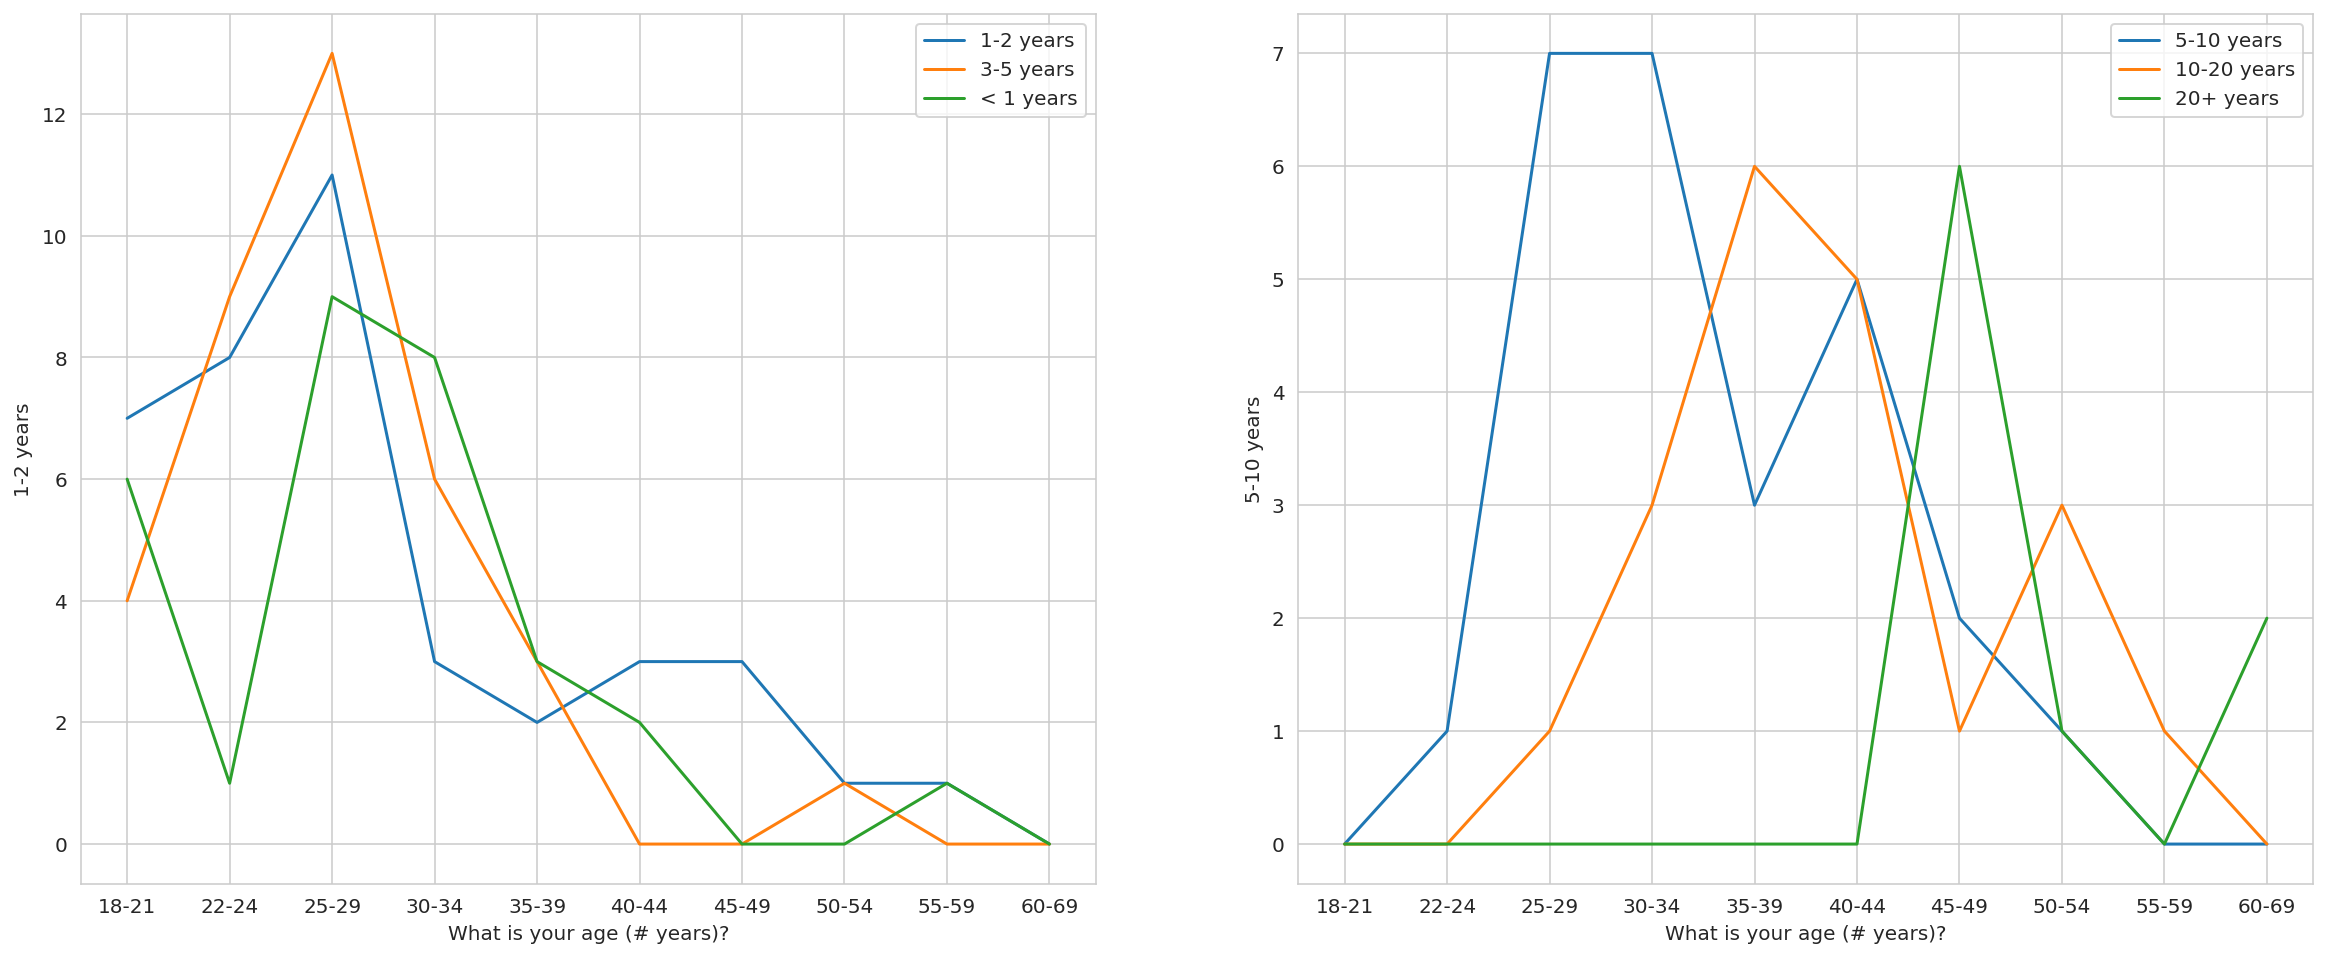

In [ ]:
fig = plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[10, 10], height_ratios=[8])
ax = plt.subplot(gs[0])
ax = sns.lineplot(x=kor_a.index, y=kor_a['1-2 years'], label='1-2 years',ax=ax)
ax = sns.lineplot(x=kor_a.index, y=kor_a['3-5 years'], label='3-5 years',ax=ax)
ax = sns.lineplot(x=kor_a.index, y=kor_a['< 1 years'], label='< 1 years',ax=ax)
ax1 = plt.subplot(gs[1])
ax1 = sns.lineplot(x=kor_a.index, y=kor_a['5-10 years'], label='5-10 years',ax=ax1)
ax1 = sns.lineplot(x=kor_a.index, y=kor_a['10-20 years'], label='10-20 years', ax=ax1)
ax1 = sns.lineplot(x=kor_a.index, y=kor_a['20+ years'], label='20+ years',ax=ax1)

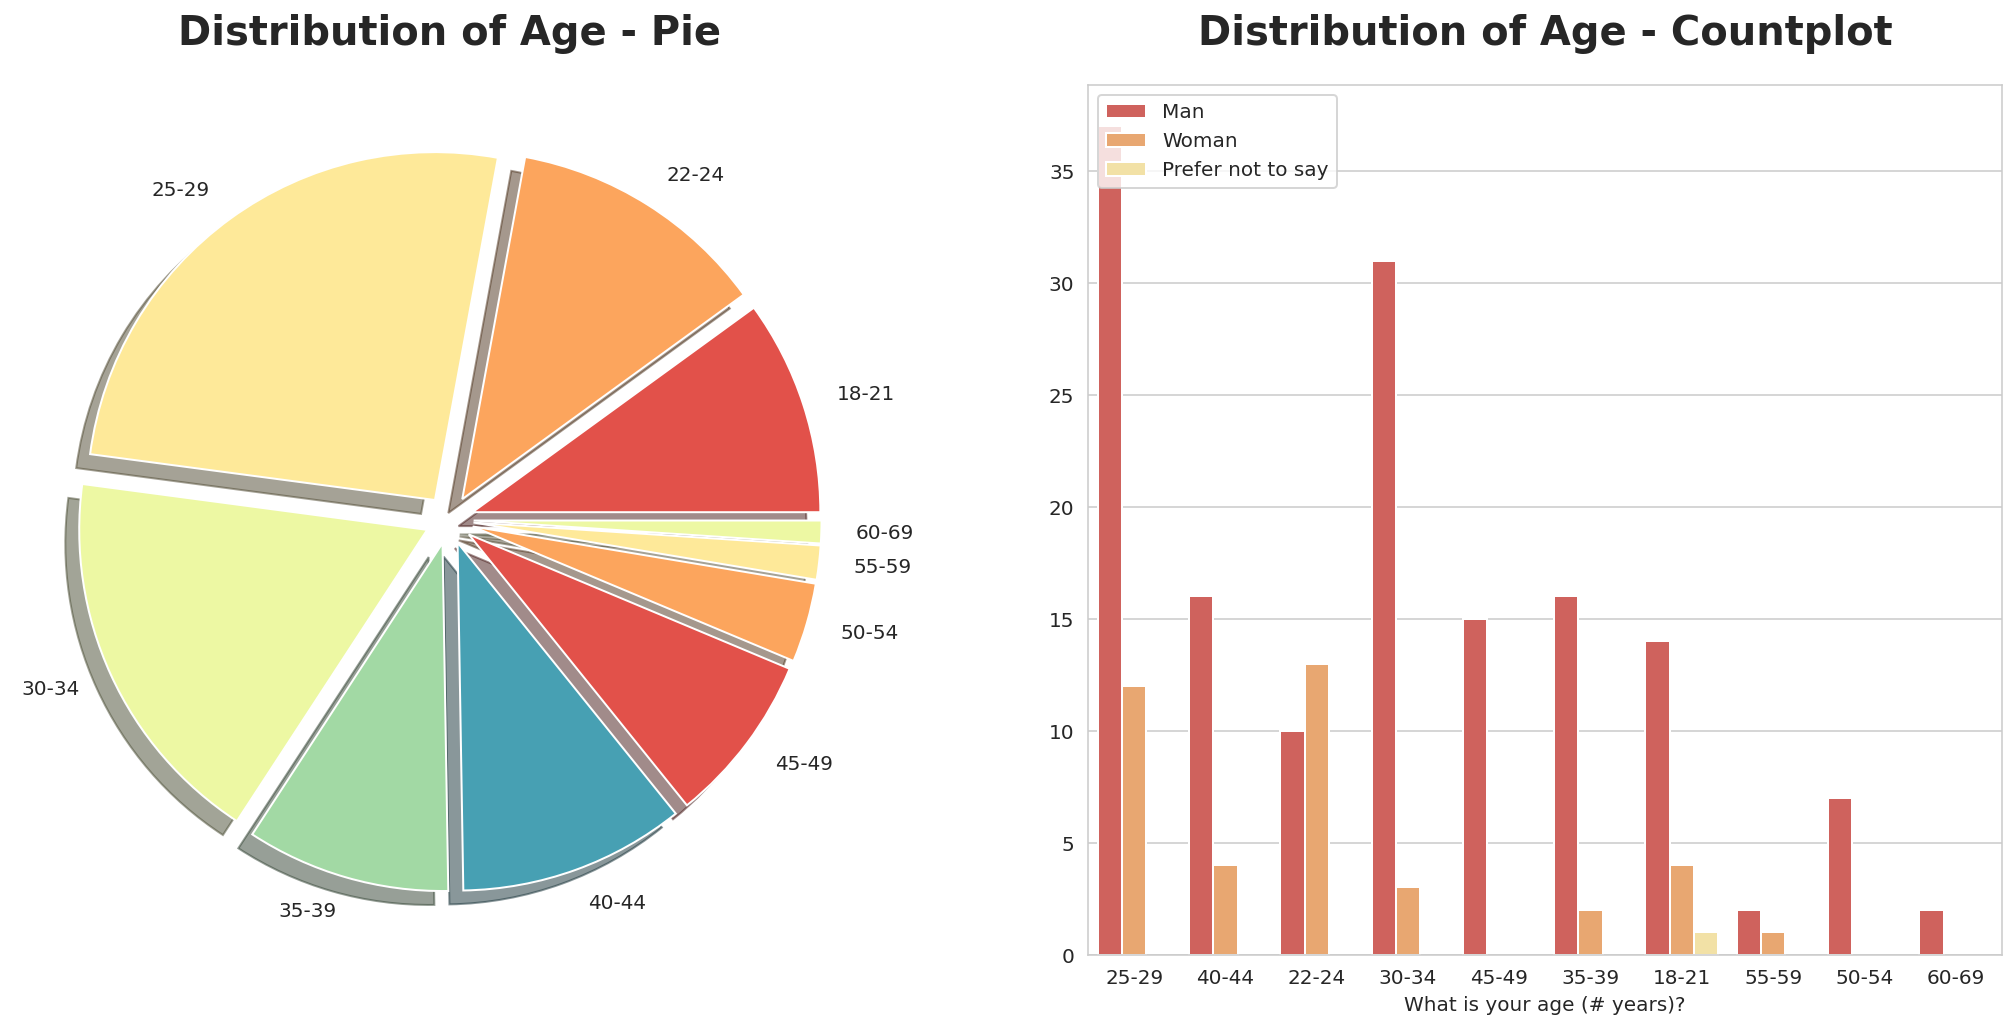

In [ ]:
fig = plt.figure(figsize=(18,8))
gs = gridspec.GridSpec(nrows=1, ncols=2)
ax = plt.subplot(gs[0])
ax = kor_data['What is your age (# years)?'].value_counts().sort_index().plot.pie(explode=[0.07 for i in range(len(kor_data['What is your age (# years)?'].value_counts().index))],
                                                                             shadow=True, colors=sns.set_palette('Spectral'))
ax.set_ylabel('')
ax.set_title('Distribution of Age - Pie', fontsize=20, fontweight='bold', pad=20 )

ax1 = plt.subplot(gs[1])
ax1 = sns.countplot(kor_data['What is your age (# years)?'], hue=kor_data['What is your gender? - Selected Choice'], color=sns.set_palette('Spectral'))
ax1.set_ylabel('')
ax1.set_title('Distribution of Age - Countplot', fontsize=20, fontweight='bold', pad=20)
ax1.legend()

In [ ]:
w_p_k_n = [x for x in kor_data.columns if x.find('What programming languages do you use on a regular basis?') != -1]
w_p_k_n

['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Java',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Javascript',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Julia',
 'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Swift',

In [ ]:
w_p_k = pd.Series(0)
for i in w_p_k_n:
  w_p_k = w_p_k.append(kor_data[i].value_counts())
w_p_k = w_p_k.drop([0])

In [ ]:
fig = px.bar(w_p_k, x=w_p_k.index, y=w_p_k, color=w_p_k, color_continuous_scale='algae')
fig.update_layout(title='Most programming languages')

In [ ]:
w_p_k

Python        141
R              45
SQL            46
C              48
C++            36
Java           29
Javascript     16
Julia           1
Swift           1
Bash            9
MATLAB         19
Other          11
dtype: int64

In [ ]:
w_p_k_r = kor_data['What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice'].value_counts()
w_p_k_r

Python    127
R          12
C           7
SQL         3
MATLAB      3
Java        2
C++         1
Julia       1
Name: What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice, dtype: int64

In [ ]:
### 그렇다면 다양한 사람마다 몇개의 프로그래밍 언어를 할줄 알까?

In [ ]:
kor_j_p = kor_data.groupby('Select the title most similar to your current role (or most recent title if retired): - Selected Choice').count().loc[:,'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python':'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].T
kor_j_p.index = ['Python', 'R', 'SQL', 'C', 'C++', 'Java', 'Javascript', 'Julia', 'Swift', 'Bash', 'MATLAB', 'None', 'Other']
kor_j_p

Select the title most similar to your current role (or most recent title if retired): - Selected Choice  Business Analyst  ...  Student
Python                                                                                                                  4  ...       44
R                                                                                                                       1  ...        8
SQL                                                                                                                     1  ...       12
C                                                                                                                       0  ...       15
C++                                                                                                                     0  ...       10
Java                                                                                                                    1  ...        9
Javascript                                                                                                              1  ...        3
Julia                                                                                                                   0  ...        1
Swift                                                                                                                   0  ...        0
Bash                                                                                                                    0  ...        1
MATLAB                                                                                                                  0  ...        7
None                                                                                                                    0  ...        0
Other                                                                                                                   0  ...        2

[13 rows x 13 columns]

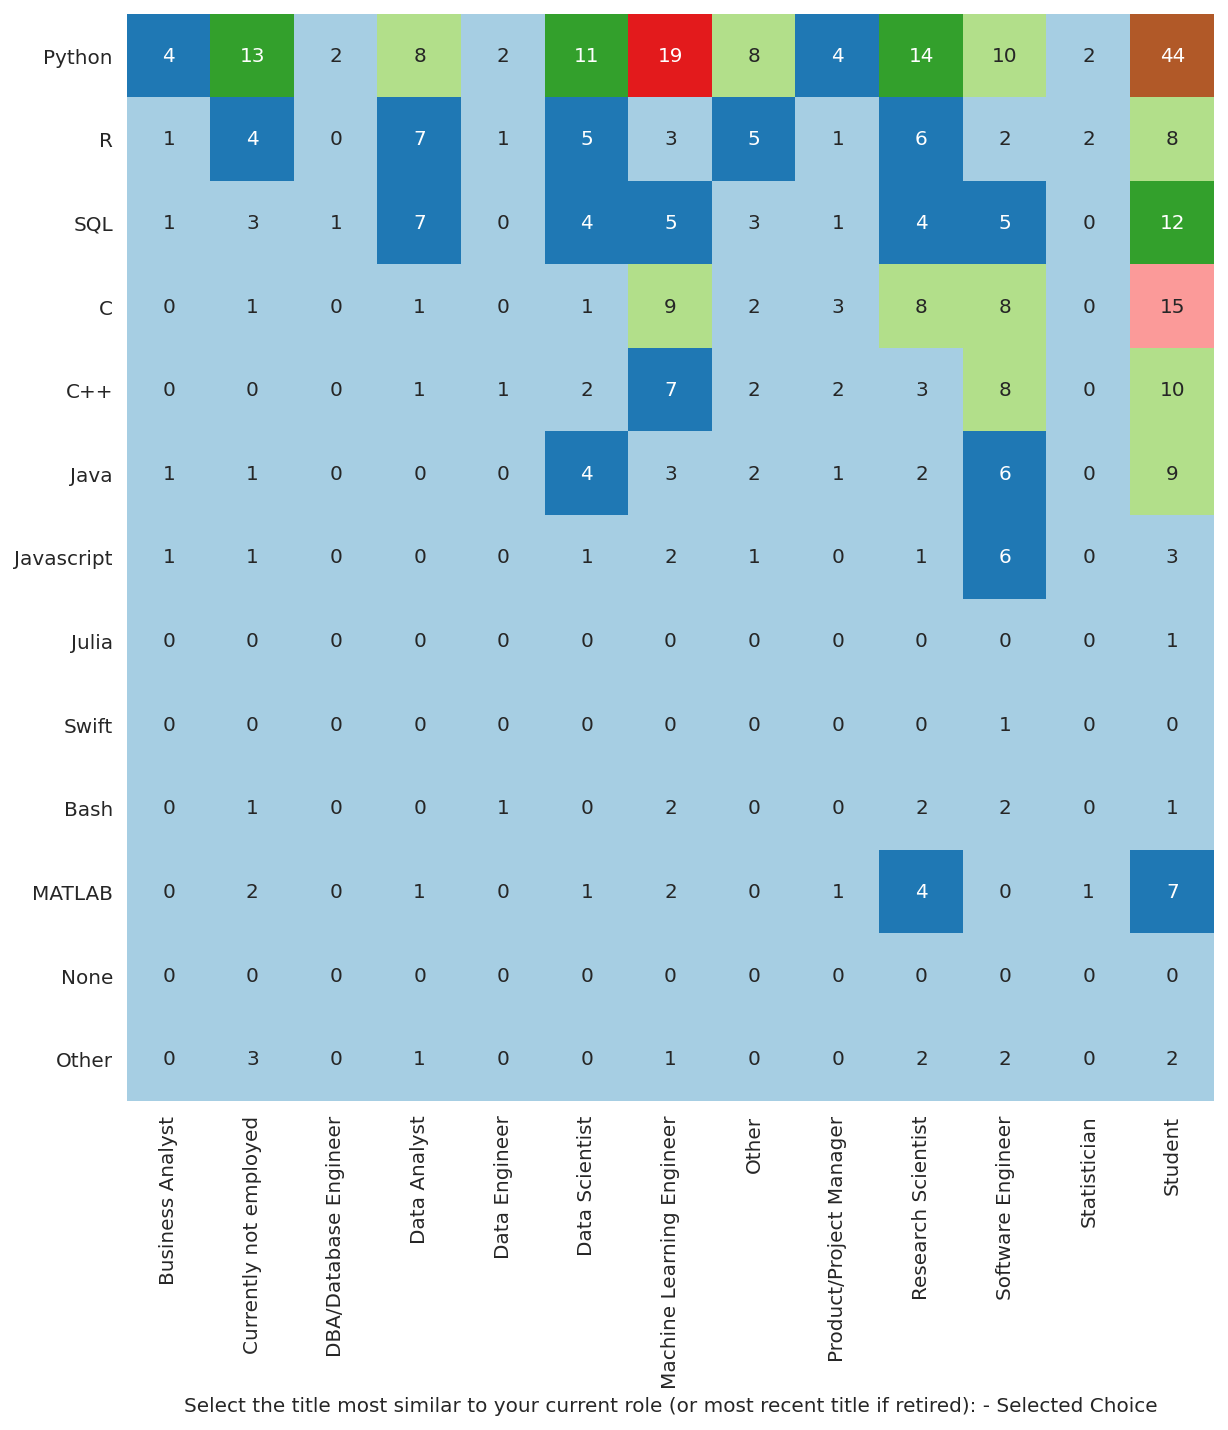

In [ ]:
plt.figure(figsize=(20,10)) ### 직업별 할수있는 프로그래밍
sns.heatmap(kor_j_p, annot=True, cbar=False, square=True, cmap='Paired')  ### 학생들이 압도적으로 많다.

In [ ]:
kor_data[kor_data.iloc[:,7:20].T.count() < 1]  ## 프로그래밍을 하나도 할줄 모르는 사람들...

0     Duration (in seconds)  ... In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other
871                      59  ...                                                NaN                                                                                                             
1566                  10700  ...                                                NaN                                                                                                             
1936                    475  ...                                                NaN                                                                                                             
2229                     87  ...                                                NaN                                                                                                             
2992                    145  ...                                                NaN                                                                                                             
4333                    259  ...                                                NaN                                                                                                             
4349                    121  ...                                                NaN                                                                                                             
4537                    245  ...                                                NaN                                                                                                             
6396                     48  ...                                                NaN                                                                                                             
6459                   6528  ...                                                NaN                                                                                                             
8119                     74  ...                                                NaN                                                                                                             
8127                    256  ...                                                NaN                                                                                                             
8257                    104  ...                                                NaN                                                                                                             
8443                    897  ...                                                NaN                                                                                                             
8509                    217  ...                                                NaN                                                                                                             
8930                    173  ...                                                NaN                                                                                                             
9170                 950988  ...                                                NaN                                                                                                             
9250                    194  ...                                                NaN                                                                                                             
9562                     42  ...                                                NaN                                                                                                             
9675                     75  ...                                                NaN                                                         

In [ ]:
k_p_c = kor_data.iloc[:,7:20]
k_p_p = k_p_c.T.count() ## 한국 사람이 할줄아는 프로그래밍 개수

Text(0.5, 0, 'number of possible programing skils')

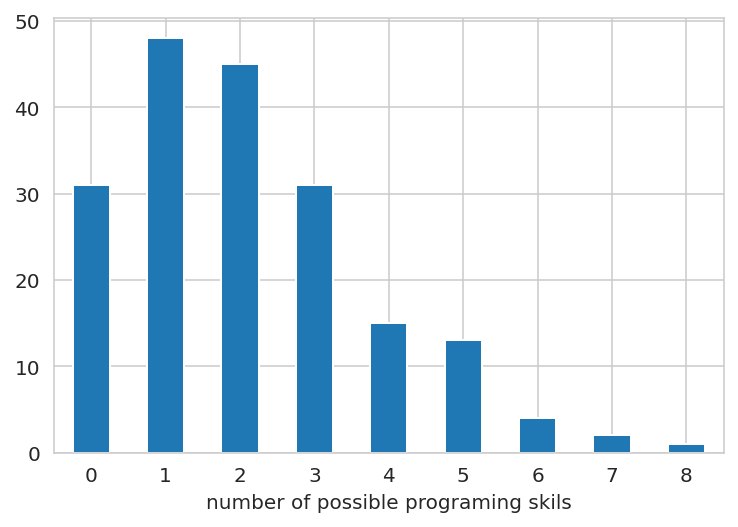

In [ ]:
k_p_p.value_counts().sort_index().plot.bar()
plt.xticks(rotation=360)
plt.xlabel('number of possible programing skils')

In [ ]:
k_p_c = k_p_c.fillna(0)

In [ ]:
k_p_c_d = pd.get_dummies(k_p_c, drop_first=True)

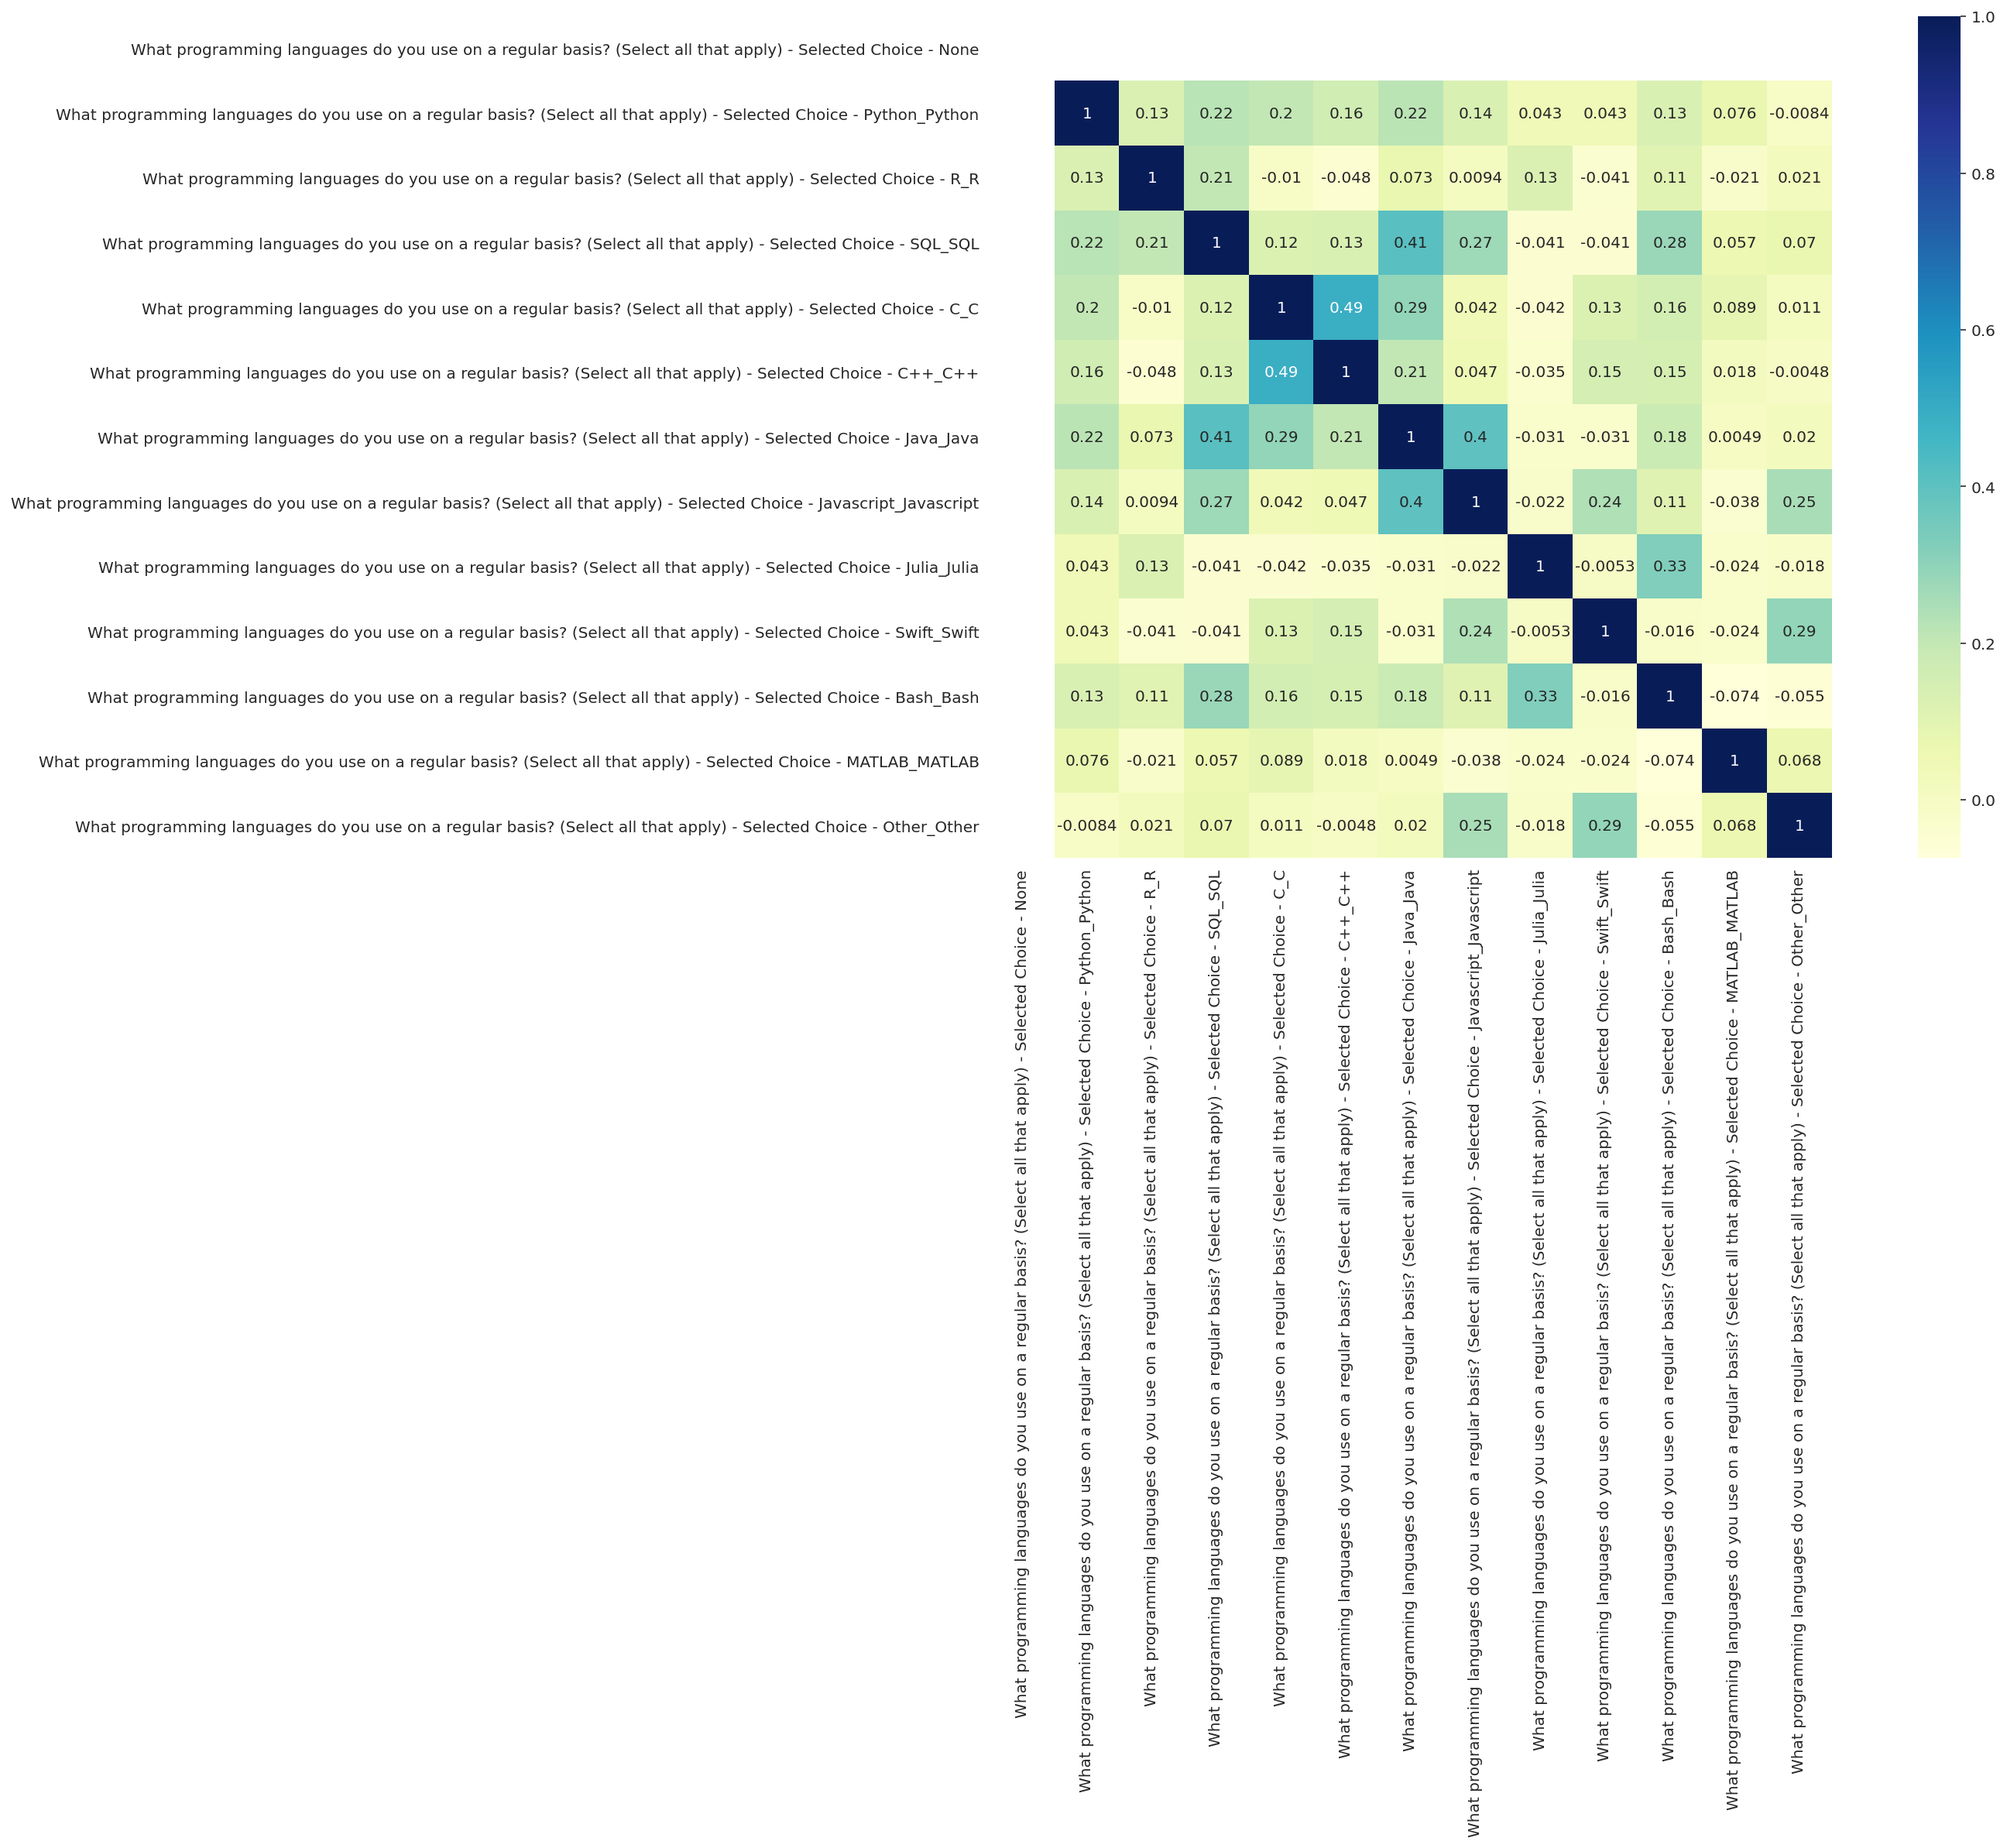

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(k_p_c_d.corr(), annot=True, cmap='YlGnBu', square=True)   ## 프로그래밍 언어별 상관관계
### C와 C++이이 가장 높고, SQL과 java가 그 다음으로 높다, java와 javascript도 높다.
### java가 각 상관관계가 높고, SQL도 상관관계가 꽤 높다.
### 놀라운것은 python의 상관관계가 낮다는 것이다.(의외로 파이썬만 할줄알거나, 자바는 할줄아는데 파이썬은 못하는사람들이 많다.)

In [ ]:
### 세계로 넓혀서 프로그래밍 별 상관관계 측정(범주형 변수이기 때문 pd.get_dummies())

In [ ]:
w_p_c = data.loc[:,'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python':'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other']

In [ ]:
w_p_c_d = pd.get_dummies(w_p_c)

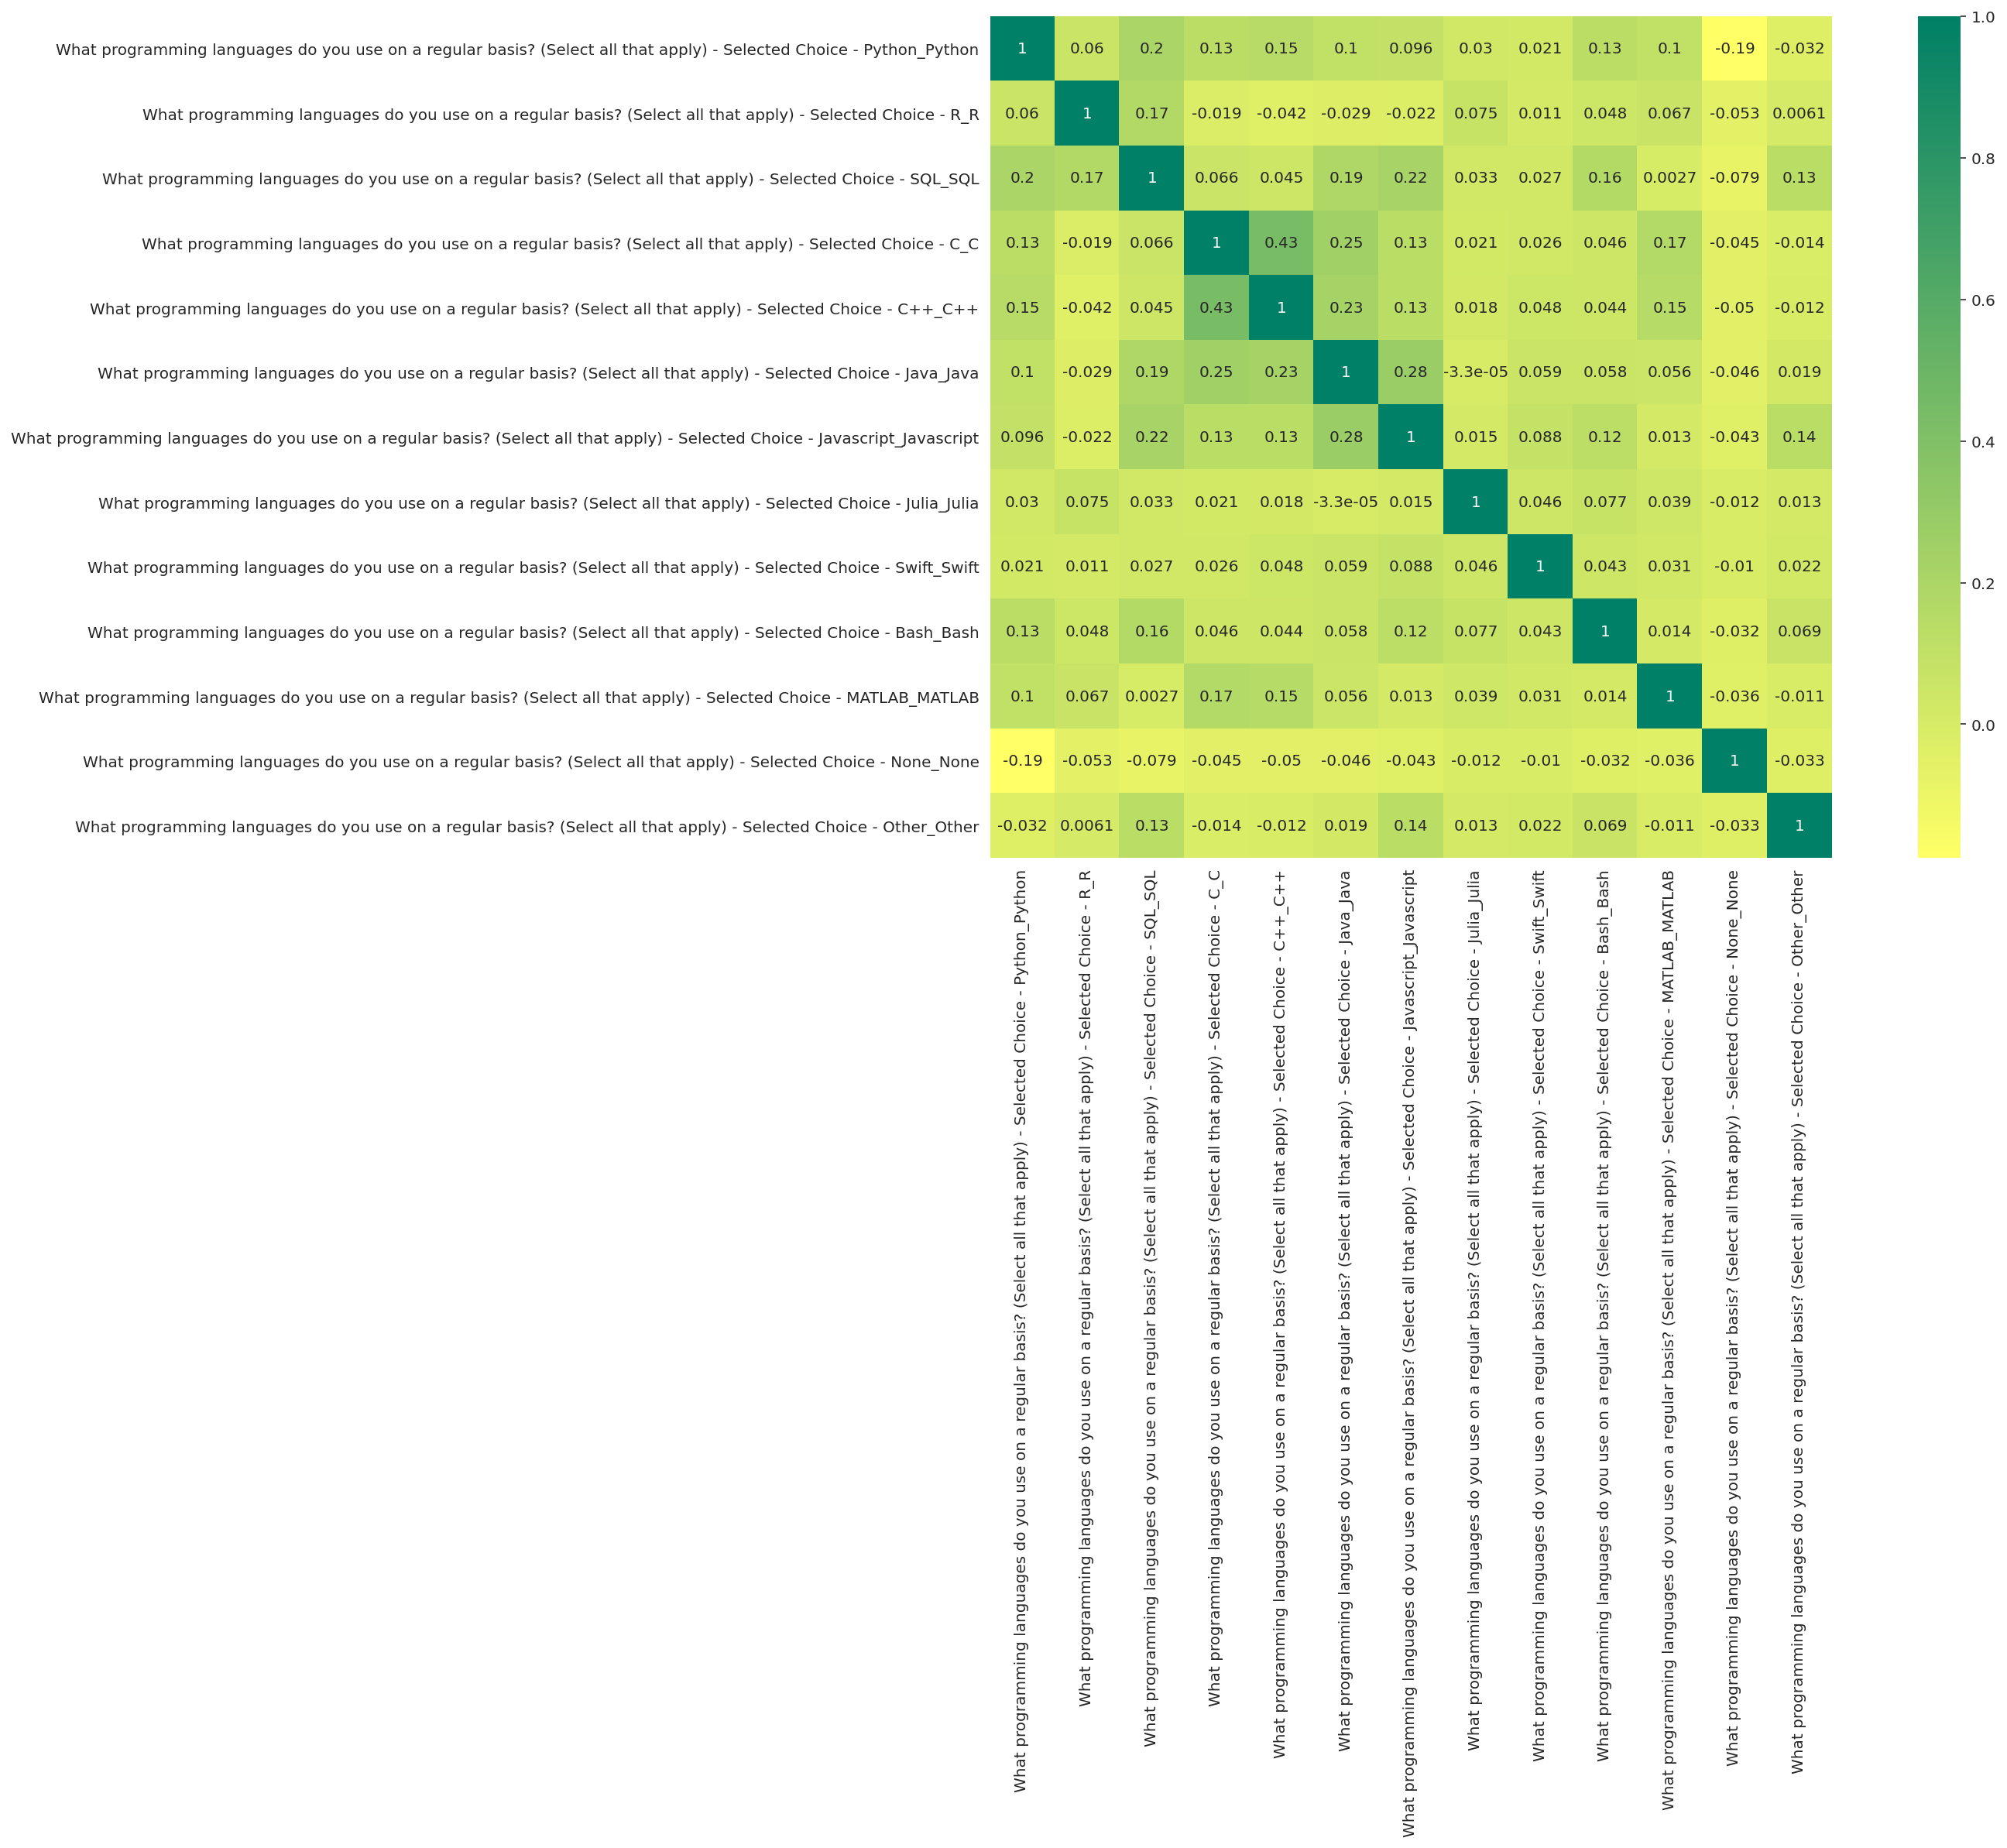

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(w_p_c_d.corr(), annot=True, cmap='summer_r', square=True)  ### 세계인들도 약간 비슷하다 java빼고(그래도 java가 상관관계가 높은편)

In [ ]:
c_p = kor_data[kor_data['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python']=='Python'] ### 파이썬 할줄 아는 사람은 어떤 툴을 다룰줄 아는가?

In [ ]:
c_p = c_p.fillna(0)

In [ ]:
c_p.loc[:,'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python':'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].value_counts().reset_index(name='counts')
### 왜 됐지?? 원래 여러 열있는 데이터는 value_counts() 안되지않나?

What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python  ... counts
0                                              Python                                                            ...     38
1                                              Python                                                            ...     11
2                                              Python                                                            ...      8
3                                              Python                                                            ...      6
4                                              Python                                                            ...      6
5                                              Python                                                            ...      6
6                                              Python                                                            ...      6
7                                              Python                                                            ...      5
8                                              Python                                                            ...      3
9                                              Python                                                            ...      2
10                                             Python                                                            ...      2
11                                             Python                                                            ...      2
12                                             Python                                                            ...      2
13                                             Python                                                            ...      2
14                                             Python                                                            ...      2
15                                             Python                                                            ...      2
16                                             Python                                                            ...      2
17                                             Python                                                            ...      2
18                                             Python                                                            ...      1
19                                             Python                                                            ...      1
20                                             Python                                                            ...      1
21                                             Python                                                            ...      1
22                                             Python                                                            ...      1
23                                             Python                                                            ...      1
24                                             Python                                                            ...      1
25                                             Python                                                            ...      1
26                                             Python                                                            ...      1
27                                             Python                                                            ...      1
28                                             Python                                                            ...      1
29                                             Python                                                            ...      1
30                                             Python                                                            ...      1
31                                 

In [ ]:
a = [x for x in c_p.loc[:,'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R':'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other'].values if x != 0]

ValueError: ignored

In [ ]:
a

[]

In [ ]:
data.head()

0 Duration (in seconds)  ... In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other
1                  1838  ...                                                NaN                                                                                                             
2                289287  ...                                                NaN                                                                                                             
3                   860  ...                                                NaN                                                                                                             
4                   507  ...                                                NaN                                                                                                             
5                    78  ...                                                NaN                                                                                                             

[5 rows x 355 columns]